<h1>Consolidated Segmentation and Churn Analysis of Bank Clients</h1>

By: [Tamjid Ahsan](https://www.linkedin.com/in/tamjidahsan/) 

<br>

As capstone project of [Flatiron Data Science Bootcamp](https://flatironschool.com/campus-and-online-data-science-bootcamp/).
* Student pace: Full Time
* Scheduled project review date/time: July 22, 2021, 04:00 PM [DST]
* Instructor name: James Irving

## ABSTRACT
___
Attracting new customers is no longer a good strategy for mature businesses since the cost of retaining existing customers is much lower. For this reason, customer churn management becomes instrumental for any service industry.

This analysis is combining churn prediction and customer segmentation and aims to come up with an integrated customer analytics outline for churn management. There are six components in this analysis, starting with data pre-processing, exploratory data analysis, customer segmentation, customer characteristics analytics, churn prediction, and factor analysis. This analysis is adapting OESMiN framework for data science.

Customer data of a bank is used for this analysis. After preprocessing and exploratory data analysis, customer segmentation is carried out using K-means clustering. A Random Forest model is used focusing on optimizing f-1 score to validate the clustering and get feature importance. By using this model, customers are segmented into different groups, which sanctions marketers and decision makers to implement existing customer retention strategies more precisely.  Then different machine learning models are used with the preprocessed data along with the segmentation prediction from the K-means clustering model. For this type of modeling, models were optimized for precision. To address class imbalance Synthetic Minority Oversampling Technique (SMOTE) is applied to the training set. For factor analysis feature importance of models are used.
Based on cluster characteristics, clients are labeled as `Low value frequent users of services`, `High risk clients segmentation`, `Regular clients`, `Most loyal clients`, and `High value clients`. Final model accuracy is 0.97 with good precision of predicting churn at around 0.93.


## OVERVIEW
___
<br>

<img src="./assets/banner_0.jpg"
     alt="head"
     style="float: center; margin-center: 2px;"><br>

Customer churn is a big issue that occurs when consumers abandon your products and go to another provider. Because of the direct impact on profit margins, firms are now focusing on identifying consumers who are at danger of churning and keeping them through tailored promotional offers. Customer churn analysis and customer turnover rates are frequently used as essential business indicators by banks, insurance firms, streaming service providers, and telecommunications service providers since the cost of maintaining existing customers is significantly less than the cost of obtaining a new one.

When it comes to customers, the financial crisis of 2008 changed the banking sector's strategy. Prior to the financial crisis, banks were mostly focused on acquiring more and more clients. However, once the market crashed after the market imploded, banks realized rapidly that the expense of attracting new clients is multiple times higher than holding existing ones, which means losing clients can be monetarily unfavorable. Fast forward to today, and the global banking sector has a market capitalization of $7.6 trillion, with technology and laws making things easier than ever to transfer assets and money between institutions. Furthermore, it has given rise to new forms of competition for banks, such as open banking, neo-banks, and fin-tech businesses (Banking as a Service (BaaS))<sup>[1]</sup>. Overall, today's consumers have more options than ever before, making it easier than ever to transfer or quit banks altogether. According to studies, repeat customers seem to be more likely to spend 67 percent more on a bank's products and services, emphasizing the necessity of knowing why clients churn and how it varies across different characteristics. Banking is one of those conventional sectors that has undergone continuous development throughout the years. Nonetheless, many banks today with a sizable client base expecting to gain a competitive advantage have not tapped into the huge amounts of data they have, particularly in tackling one of the most well-known challenges, customer turnover.

Churn can be expressed as a level of customer inactivity or disengagement seen over a specific period. This expresses itself in the data in a variety of ways e.g., frequent balance transfers to another account or unusual drop in average balance over time. But how can anyone look for churn indicators? Collecting detailed feedback on the customer's experience might be difficult. For one thing, surveys are both rare and costly. Furthermore, not all clients receive it, or bother to reply to it. So, where else can you look for indicators of future client dissatisfaction? The solution consists in identifying early warning indicators from existing data. Advanced machine learning and data science techniques can learn from previous customer behavior and external events that lead to churn and use this knowledge to anticipate the possibility of a churn-like event in the future.

___

Ref:

[1] [Business Insider](https://www.businessinsider.com/banking-industry-trends)

[2] Stock images from [PEXELS](https://www.pexels.com/)


## BUSINESS PROBLEM
___
<img src="./assets/banner.gif"
     alt="head"
     style="float: center; margin-center: 2px;"><br>

While everyone recognizes the importance of maintaining existing customers and therefore improving their lifetime value, there is very little banks can do about customer churn when they don't anticipate it coming in the first place. Predicting attrition becomes critical in this situation, especially when unambiguous consumer feedback is lacking. Precise prediction enables advertisers and client experience groups to be imaginative and proactive in their offering to the client.

XYZ Bank (read: fictional) is a mature financial institution based in Eastern North America. Recent advance in technology and rise in BaaS is a real threat for them as they can lure away the existing clientele. The bank has existing data of their clients. Based on the data available, the bank wants to know whom of them are in risk of churning. 

This analysis focuses on the behavior of bank clients who are more likely to leave the bank (<strong>i.e. close their bank account</strong>, churn).

## IMPORTS

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from imports_and_functions.packages import *
import imports_and_functions as fn

In [3]:
# notebook styling
try:
    from jupyterthemes import jtplot
except:
    !pip install jupyterthemes
    from jupyterthemes import jtplot
# jtplot.reset() # reset notebook styling
jtplot.style(theme='monokai', context='notebook', ticks='True', grid='False')

# OBTAIN

The data for this analysis is obtained from <i>Kaggle</i>, titled <b>"Credit Card customers"</b> uploaded by Sakshi Goyal. Which can be found [here](https://www.kaggle.com/sakshigoyal7/credit-card-customers), this dataset was originally obtained from [LEAPS Analyttica](https://leaps.analyttica.com/sample_cases/11). A copy of the data is in this repository at `/data/BankChurners.csv`.

This dataset contains data of more than 10000 credit card accounts with around 19 variables of different types as of a time point and their attrition indicator over the next 6 months. 

Data description is as below:

| Variable | Type | Description |
|:---:|:---:|:---:|
| Clientnum | Num | Client number. Unique identifier for the customer holding the account |
| Attrition_Flag | obj | Internal event (customer activity) variable - if the account is closed then 1 else 0 |
| Customer_Age | Num | Demographic variable - Customer's Age in Years |
| Gender | obj | Demographic variable - M=Male, F=Female |
| Dependent_count | Num | Demographic variable - Number of dependents |
| Education_Level | obj | Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.) |
| Marital_Status | obj | Demographic variable - Married, Single, Divorced, Unknown |
| Income_Category | obj | Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown) |
| Card_Category | obj | Product Variable - Type of Card (Blue, Silver, Gold, Platinum) |
| Months_on_book | Num | Months on book (Time of Relationship) |
| Total_Relationship_Count | Num | Total no. of products held by the customer |
| Months_Inactive_12_mon | Num | No. of months inactive in the last 12 months |
| Contacts_Count_12_mon | Num | No. of Contacts in the last 12 months |
| Credit_Limit | Num | Credit Limit on the Credit Card |
| Total_Revolving_Bal | Num | Total Revolving Balance on the Credit Card |
| Avg_Open_To_Buy | Num | Open to Buy Credit Line (Average of last 12 months) |
| Total_Amt_Chng_Q4_Q1 | Num | Change in Transaction Amount (Q4 over Q1)  |
| Total_Trans_Amt | Num | Total Transaction Amount (Last 12 months) |
| Total_Trans_Ct | Num | Total Transaction Count (Last 12 months) |
| Total_Ct_Chng_Q4_Q1 | Num | Change in Transaction Count (Q4 over Q1)  |
| Avg_Utilization_Ratio | Num | Average Card Utilization Ratio |

There are unknown category in Education Level, Marital Status, and Income Category. Imputing values for those features does not make sense. And it is understandable why those are unknown in the first place. Information about Education and Marital status is often complicated and confidential; and customers are reluctant to share those information. Same for the income level. It is best for the model to be able to handle when those information is not available and still produce prediction.

Because of this reason those are not imputed in any way for this analysis.

In [4]:
# loading dataset
raw_df = pd.read_csv('./data/BankChurners.csv')
# first view of the dataset
raw_df

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
0                  39  ...       12691.0                  777   
1                  44  ...        8256.0                  864   
2                  36  ...        3418.0                    0   
3                  34  ...        3313.0                 2517   
4                  21  ...        4716.0                    0   
...               ...  ...           ...                  ...   
10122              40  ...        4003.0                 1851   
10123              25  ...        4277.0                 2186   
10124              36  ...        5409.0                    0   
10125              36  ...        5281.0                    0   
10126              25  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0                    1.625                  0.061   
1                    3.714                  0.105   
2                    2.333                  0.000   
3                    2.333                  0.760   
4                    2.500                  0.000   
...                    ...                    ...   
10122                0.857                  0.462   
10123                0.683                  0.511   
10124     

In [5]:
# columns of the dataset
raw_df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [6]:
# no duplicates in the dataset
raw_df.CLIENTNUM.duplicated().value_counts()

False    10127
Name: CLIENTNUM, dtype: int64

In [7]:
# dropping customer identifier and unnecessary feature
raw_df.drop(columns=[
    'CLIENTNUM',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
],
        inplace=True)
raw_df

Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer            45      M                3   
1      Existing Customer            49      F                5   
2      Existing Customer            51      M                3   
3      Existing Customer            40      F                4   
4      Existing Customer            40      M                3   
...                  ...           ...    ...              ...   
10122  Existing Customer            50      M                2   
10123  Attrited Customer            41      M                2   
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   
10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0

In [8]:
# looking at the distribution for changing labels to more notebook friendly description
raw_df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [9]:
# cleaning text in 'Income_Category'
raw_df['Income_Category'] = raw_df['Income_Category'].apply(
    lambda x: x.replace("$", "")).apply(
        lambda x: x.replace(" - ", "_to_")).apply(
            lambda x: x.replace("120K +", "Above_120K")).apply(
                lambda x: x.replace("Less than 40K", "Less_than_40K"))
raw_df

Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer            45      M                3   
1      Existing Customer            49      F                5   
2      Existing Customer            51      M                3   
3      Existing Customer            40      F                4   
4      Existing Customer            40      M                3   
...                  ...           ...    ...              ...   
10122  Existing Customer            50      M                2   
10123  Attrited Customer            41      M                2   
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   
10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married      60K_to_80K          Blue   
1            Graduate         Single   Less_than_40K          Blue   
2            Graduate        Married     80K_to_120K          Blue   
3         High School        Unknown   Less_than_40K          Blue   
4          Uneducated        Married      60K_to_80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single      40K_to_60K          Blue   
10123         Unknown       Divorced      40K_to_60K          Blue   
10124     High School        Married   Less_than_40K          Blue   
10125        Graduate        Unknown      40K_to_60K          Blue   
10126        Graduate        Married   Less_than_40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0

In [10]:
# distribution of target
(raw_df.Attrition_Flag.value_counts(1)*100).round(2)

Existing Customer    83.93
Attrited Customer    16.07
Name: Attrition_Flag, dtype: float64

There is major class imbalance spotted in the target column.

In [11]:
df = raw_df.copy()
print(f'"df" statistical description: \n{"+"*30}')
display(fn.describe_dataframe(df))
print(f'"df" feature details: \n{"+"*30}\n')
fn.check_duplicates(df, verbose=2, limit_num=50)

"df" statistical description: 
++++++++++++++++++++++++++++++


count unique                top  freq     mean  \
Attrition_Flag            10127.0      2  Existing Customer  8500            
Customer_Age              10127.0                                    46.33   
Gender                    10127.0      2                  F  5358            
Dependent_count           10127.0                                     2.35   
Education_Level           10127.0      7           Graduate  3128            
Marital_Status            10127.0      4            Married  4687            
Income_Category           10127.0      6      Less_than_40K  3561            
Card_Category             10127.0      4               Blue  9436            
Months_on_book            10127.0                                    35.93   
Total_Relationship_Count  10127.0                                     3.81   
Months_Inactive_12_mon    10127.0                                     2.34   
Contacts_Count_12_mon     10127.0                                     2.46   
Credit_Limit              10127.0                                  8631.95   
Total_Revolving_Bal       10127.0                                  1162.81   
Avg_Open_To_Buy           10127.0                                  7469.14   
Total_Amt_Chng_Q4_Q1      10127.0                                     0.76   
Total_Trans_Amt           10127.0                                  4404.09   
Total_Trans_Ct            10127.0                                    64.86   
Total_Ct_Chng_Q4_Q1       10127.0                                     0.71   
Avg_Utilization_Ratio     10127.0                                     0.27   

                              std     min     25%     50%      75%      max  \
Attrition_Flag                                                                
Customer_Age                 8.02    26.0    41.0    46.0     52.0     73.0   
Gender                                                                        
Dependent_count               1.3     0.0     1.0     2.0      3.0      5.0   
Education_Level                                                               
Marital_Status                                                                
Income_Category                                                               
Card_Category                                                                 
Months_on_book               7.99    13.0    31.0    36.0     40.0     56.0   
Total_Relationship_Count     1.55     1.0     3.0     4.0      5.0      6.0   
Months_Inactive_12_mon       1.01     0.0     2.0     2.0      3.0      6.0   
Contacts_Count_12_mon        1.11     0.0     2.0     2.0      3.0      6.0   
Credit_Limit              9088.78  1438.3  2555.0  4549.0  11067.5  34516.0   
Total_Revolving_Bal        814.99     0.0   359.0  1276.0   1784.0   2517.0   
Avg_Open_To_Buy           9090.69     3.0  1324.5  3474.0   9859.0  34516.0   
Total_Amt_Chng_Q4_Q1         0.22     0.0    0.63    0.74     0.86      3.4   
Total_Trans_Amt           3397.13   510.0  2155.5  3899.0   4741.0  18484.0   
Total_Trans_Ct              23.47    10.0    45.0    67.0     81.0    139.0   
Total_Ct_Chng_Q4_Q1          0.24     0.0    0.58     0.7     0.82     3.71   
Avg_Utilization_Ratio        0.28     0.0    0.02    0.18      0.5      1.0   

                            dtype  nulls  
Attrition_Flag             object      0  
Customer_Age                int64      0  
Gender                     object      0  
Dependent_count             int64      0  
Education_Level            object      0  
Marital_Status             object      0  
Income_Category            object      0  
Card_Category              object      0  
Months_on_book              int64      0  
Total_Relationship_Count    int64      0  
Months_Inactive_12_mon      int64      0  
Contacts_Count_12_mon       int64      0  
Credit_Limit              float64      0  
Total_Revolving_Bal         int64      0  
Avg_Open_To_Buy           float64      0  
Total_Amt_Chng_Q4_Q1      float64      0 

"df" feature details: 
++++++++++++++++++++++++++++++

Attrition_Flag >> number of uniques: 2
Values:
['Existing Customer' 'Attrited Customer']
____________________________________________________________

Customer_Age >> number of uniques: 45
Values:
[45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]
____________________________________________________________

Gender >> number of uniques: 2
Values:
['M' 'F']
____________________________________________________________

Dependent_count >> number of uniques: 6
Values:
[3 5 4 2 0 1]
____________________________________________________________

Education_Level >> number of uniques: 7
Values:
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
____________________________________________________________

Marital_Status >> number of uniques: 4
Values:
['Married' 'Single' 'Unknown' 'Divorced']
_________________________

No null values to deal with. Features have the correct data type. No unknown category is spotted, and statistics does not warrant any closer inspection. 

# EDA

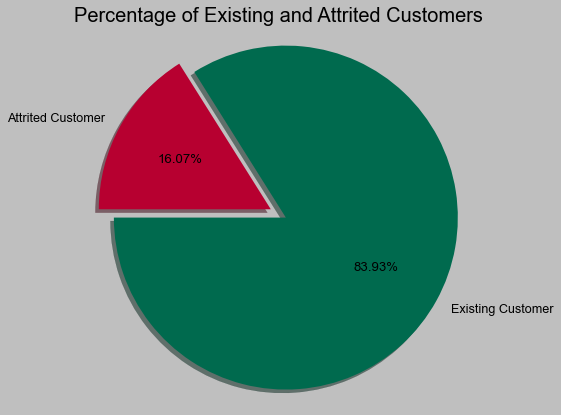

In [12]:
with plt.style.context('grayscale'): # seaborn-deep
    plt.pie([
        df.Attrition_Flag[df.Attrition_Flag == 'Existing Customer'].count(),
        df.Attrition_Flag[df.Attrition_Flag == 'Attrited Customer'].count()
    ],
            labels=['Existing Customer', 'Attrited Customer'],
            colors=['#006a4e', '#b70030'],
            explode=[0.1, 0],
            autopct='%1.2f%%',
            shadow=True,
            startangle=180)
    plt.title("Percentage of Existing and Attrited Customers", size=20)
    plt.axis('equal')
    plt.show()

 In this dataset, around 16% clients has halted their affiliation with the bank.

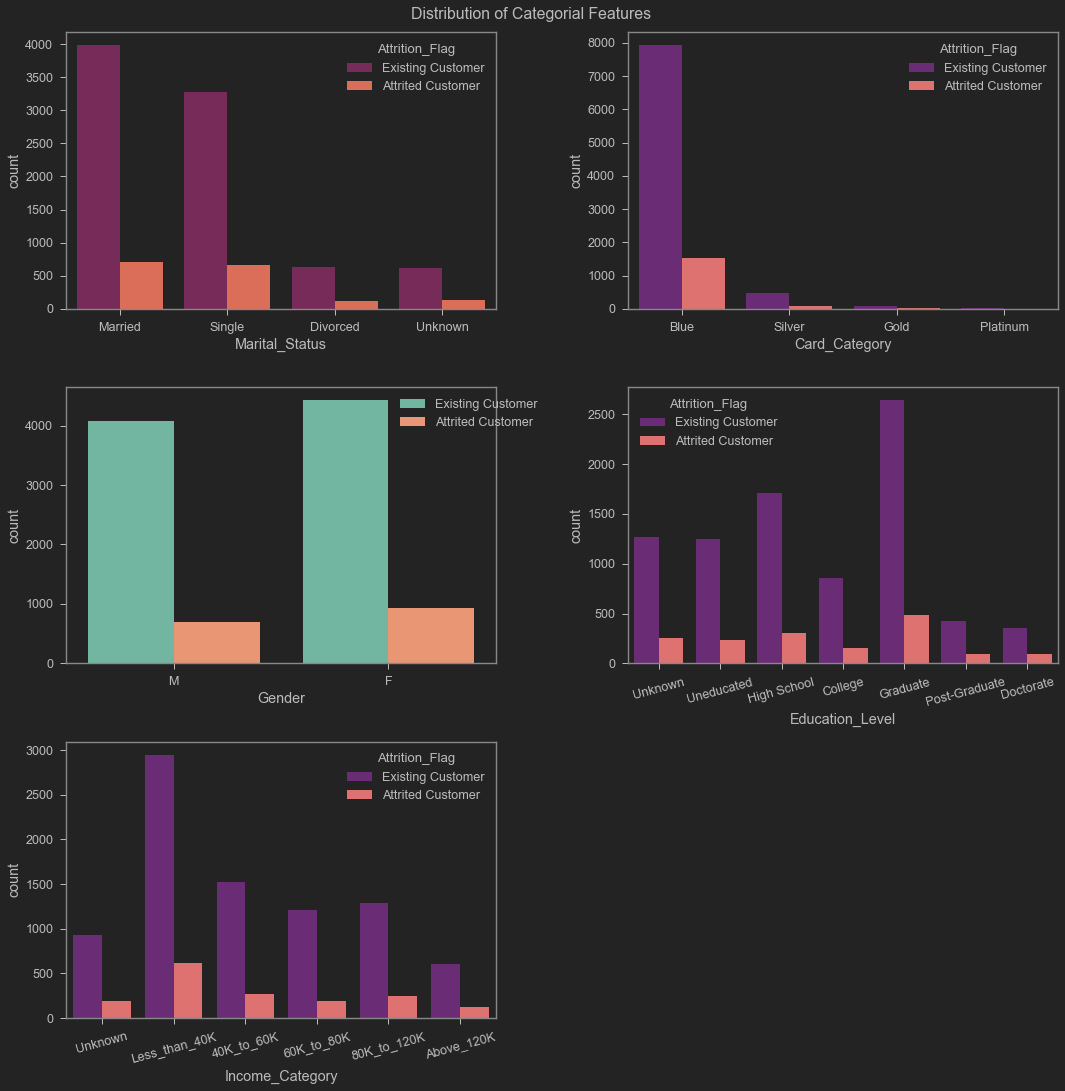

In [13]:
plt.figure(figsize=(15, 15))
plt.subplot(3, 2, 1)
sns.countplot(x=df['Marital_Status'],
              hue=df['Attrition_Flag'],
              palette='rocket',
              order=['Married', 'Single', 'Divorced', 'Unknown'])
plt.subplot(3, 2, 2)
sns.countplot(x=df['Card_Category'],
              hue=df['Attrition_Flag'],
              palette='magma',
              order=['Blue', 'Silver', 'Gold', 'Platinum'])
plt.subplot(3, 2, 3)
sns.countplot(x=df['Gender'], hue=df['Attrition_Flag'], palette='Set2')
plt.legend(bbox_to_anchor=(.75, 1))
plt.subplot(3, 2, 4)
sns.countplot(x=df['Education_Level'],
              hue=df['Attrition_Flag'],
              palette='magma',
              order=[
                  'Unknown', 'Uneducated', 'High School', 'College',
                  'Graduate', 'Post-Graduate', 'Doctorate'
              ])
plt.xticks(rotation=15)
plt.subplot(3, 2, 5)
sns.countplot(x=df['Income_Category'],
              hue=df['Attrition_Flag'],
              palette='magma',
              order=[
                  'Unknown', 'Less_than_40K', '40K_to_60K', '60K_to_80K',
                  '80K_to_120K', 'Above_120K'
              ])
plt.xticks(rotation=15)
plt.tight_layout()
plt.suptitle(f'Distribution of Categorial Features \n', va='bottom')
plt.show()

| Category | Observation |
|---|:---:|
|  Marital Status  | Being married or single has little impact on them churning |
|  Card Category  | Blue category severely out weighs the other card categories |
|  Gender  | Slightly more female clients than men, overall almost similar churning possibility |
|  Education Level  | Most of the clients of the bank are graduate, given the size of each class, churn rate is very similar |
|  Income Category  | Most of the clients earn less than 40K. |

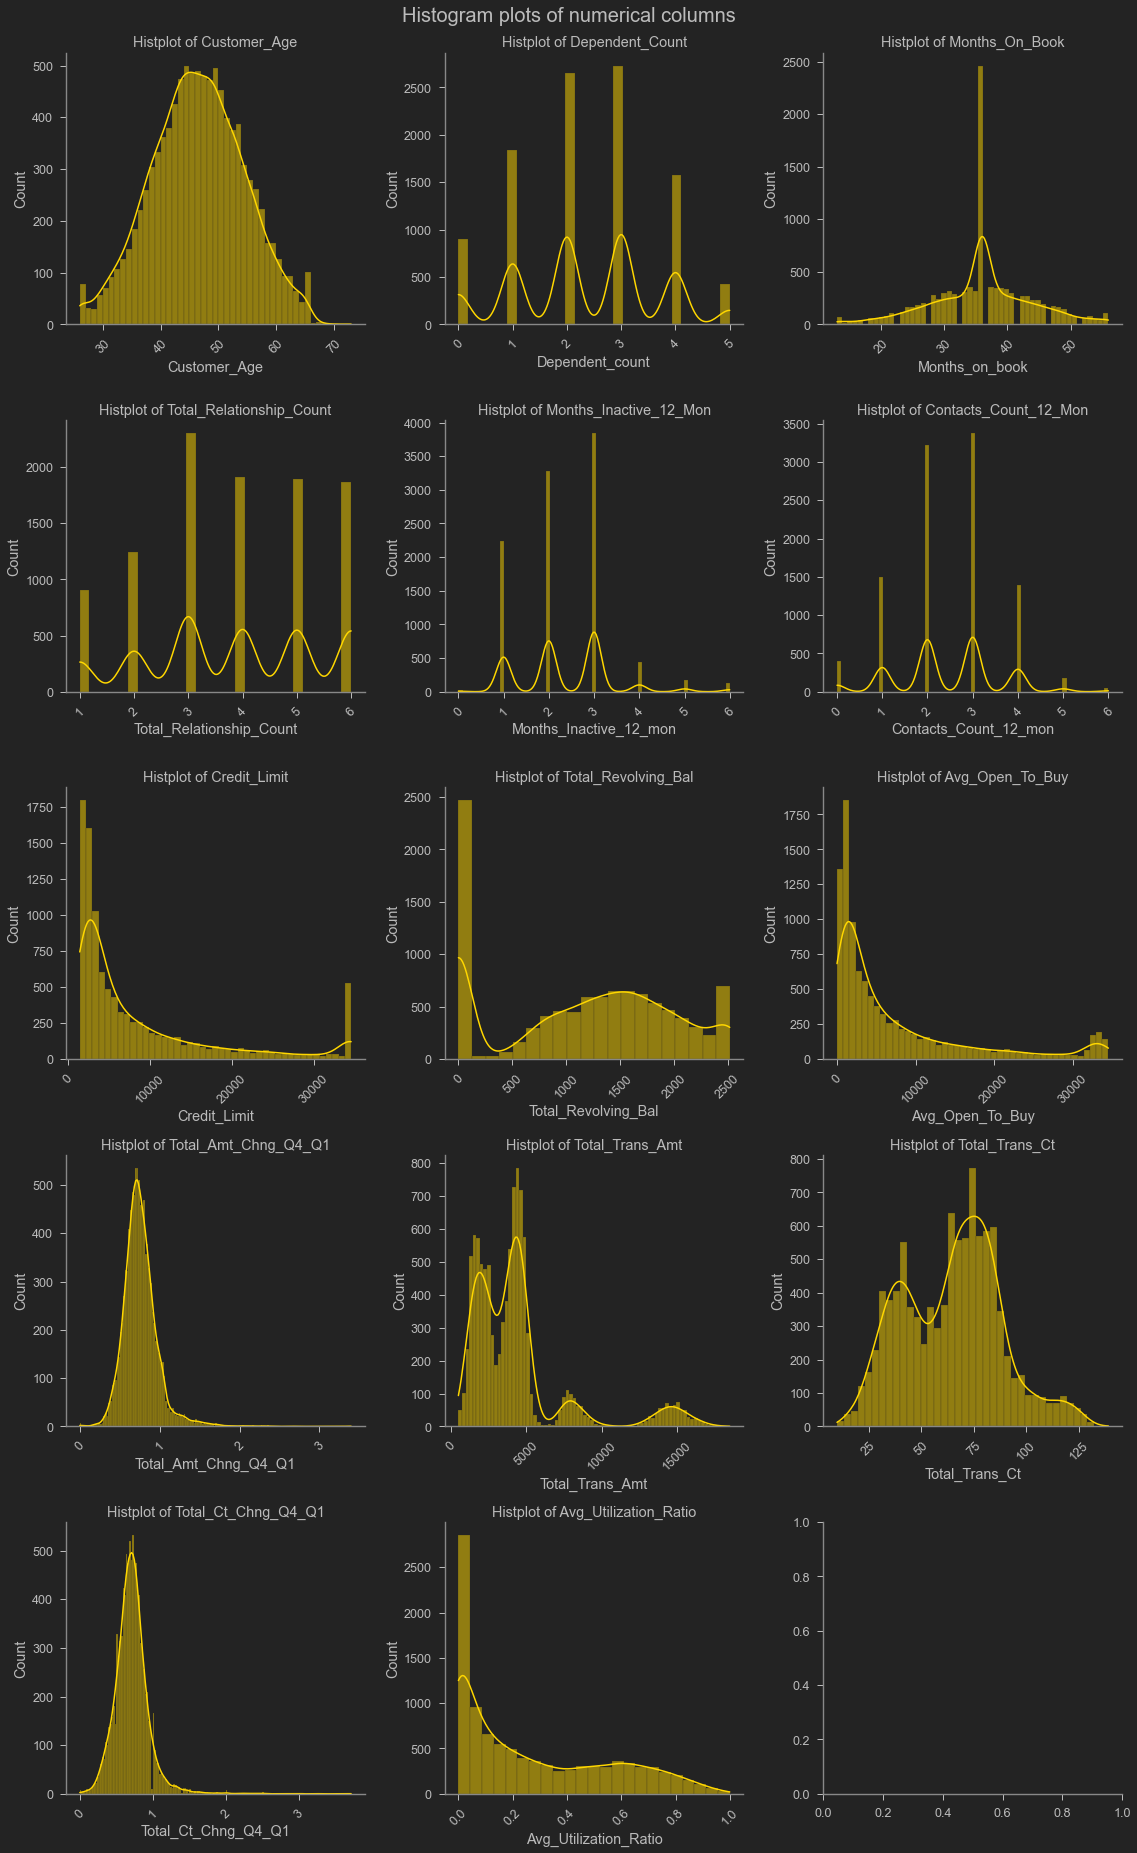

In [14]:
fn.plot_distribution(df.select_dtypes('number'),
                     plot_title='Histogram plots of numerical columns')

Most of them are not normally distributed. Using logistic regression might not be the best performing model for this analysis. As it fail to meet linearity assumption most of the time. For this feature transformation will be required.

<br>

| Feature | Observation |
|---|:---:|
|  Customer Age  | Normal distribution for age |
|  Dependent count  | ordinal   variable ranging one to five|
|  Months on book  | Almost normal distribution except a huge   spike at 36 moth point and a gap at every 6 month interval |
|  Total Relationship Count  | ordinal   variable, majority of clients have 3 or more relationship |
|  Months_Inactive_12_mon  | most customers don’t stay inactive more   than 3 months |
|  Contacts_Count_12_mon  | ordinal   variable, most values in 2 and 3 |
|  Credit Limit  | Almost log normal distribution, maximum   credit limit offered is 35k. |
|  Total Revolving Bal  | ignoring   a spike of 0, this distribution has almost normal distribution, with a fat   tail at the right end |
|  Avg Open To Buy  | log normal distribution |
|  Total_Amt_Chng_Q4_Q1  | normal   distribution with skinny ling tail towards right |
|  Total Trans Amt  | seems like there are four normal   distribution here, this can be a strong deciding feature for use in   segmentation |
|  Total Trans Ct  | normal   distribution with skinny ling tail towards right |
|  Total_Ct_Chng_Q4_Q1  | good distribution but far from being   normal distribution |
|  Avg Utilization Ratio  | Log   normal distribution, a very few people are using their total credit limit.   This expected as very few people does so. |

In [15]:
print(f'Minimum customer age: {df.Customer_Age.unique().min()}')
print(f'Maximum customer age: {df.Customer_Age.unique().max()}')

Minimum customer age: 26
Maximum customer age: 73


In [17]:
# pairweise eda

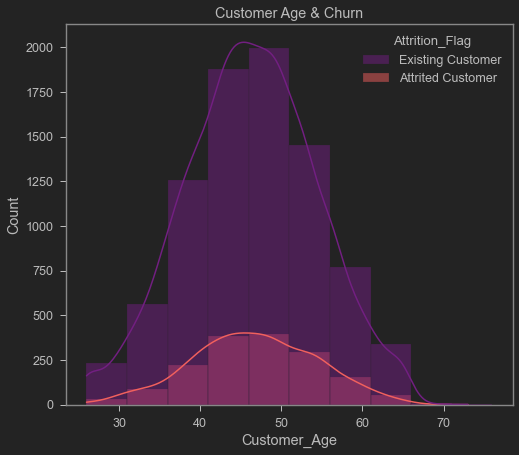

In [18]:
sns.histplot(x=df.Customer_Age,
             hue=df.Attrition_Flag,
             kde=True,
             binwidth=5,
             palette='magma')
plt.title('Customer Age & Churn')
plt.show()

There is no clear pattern spotted. Every client age group is similarly likely to churn.

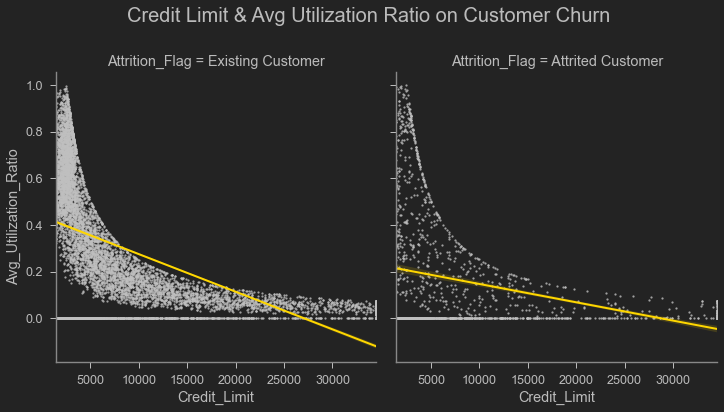

In [19]:
sns.lmplot(x='Credit_Limit',
           y='Avg_Utilization_Ratio',
           data=df,
           col='Attrition_Flag',
           palette='Set2',
           scatter_kws={
               "s": 5,
               "color": 'silver'
           },
           line_kws={
               'lw': 2,
               'color': 'gold'
           })
plt.suptitle('Credit Limit & Avg Utilization Ratio on Customer Churn \n',
             va='bottom',
             fontsize=20)
plt.show()

Clients with lower credit limit utilization ratio is more likely to churn. They have a less steep regression line. Also, Clients with lower credit limit with high utilization has more risk of churning.

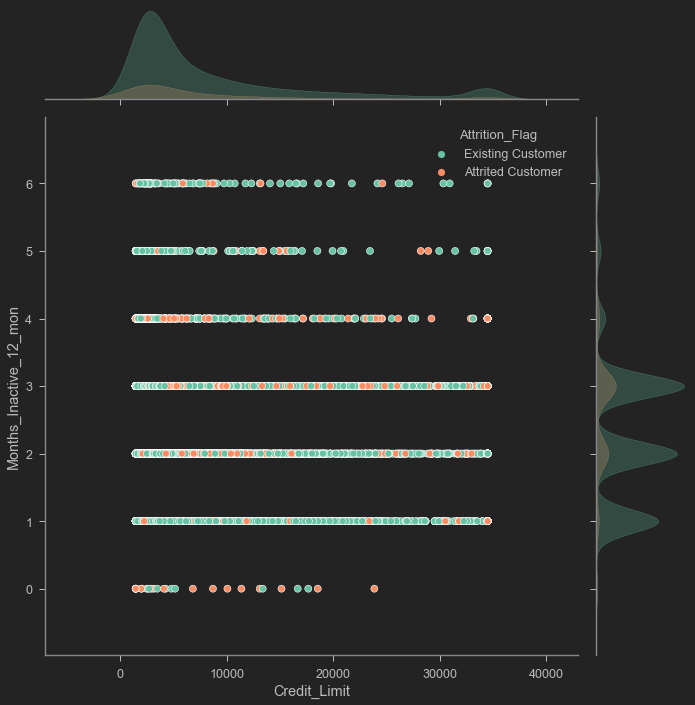

In [21]:
g = sns.jointplot(data=df,
              x='Credit_Limit',
              y='Months_Inactive_12_mon',
              hue='Attrition_Flag',
              palette='Set2',
              height=10)

Clients inactive for 3 to 4 month has a higher risk  of churning.

# SCRUB

In [23]:
(df.Attrition_Flag.value_counts(1)*100).round(2)

Existing Customer    83.93
Attrited Customer    16.07
Name: Attrition_Flag, dtype: float64

As spotted before, class imbalance in the target column will be addressed by synthetic oversampling later in this section.

## Label encoding

In [24]:
# ML friendly labels
churn_map = {'Existing Customer':0, 'Attrited Customer':1}

In [25]:
X = df.drop(columns='Attrition_Flag').copy()
y = df.Attrition_Flag.map(churn_map).copy()

## Train-Test split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)

## Encoding & Scaling

### Pipeline

In [27]:
# isolating numerical cols
nume_col = list(X.select_dtypes('number').columns)
# isolating categorical cols
cate_col = list(X.select_dtypes('object').columns)
# pipeline for processing categorical features
pipe_cate = Pipeline([('ohe', OneHotEncoder(sparse=False, drop=None))])
# pipeline for processing numerical features
pipe_nume = Pipeline([('scaler', StandardScaler())])
# transformer
preprocessor = ColumnTransformer([('nume_feat', pipe_nume, nume_col),
                                  ('cate_feat', pipe_cate, cate_col)])
# creating dataframes
# X_train
X_train_pr = pd.DataFrame(preprocessor.fit_transform(X_train),
                          columns=nume_col +
                          list(preprocessor.named_transformers_['cate_feat'].
                               named_steps['ohe'].get_feature_names(cate_col)))
# X_test
X_test_pr = pd.DataFrame(preprocessor.transform(X_test),
                         columns=nume_col +
                         list(preprocessor.named_transformers_['cate_feat'].
                              named_steps['ohe'].get_feature_names(cate_col)))

In [1]:
# # preprocessor, nume_col, cate_col are saved for later use
# joblib.dump(preprocessor, filename='./model/preprocessor.joblib', compress=9)
# joblib.dump(nume_col, filename='./model/nume_col.joblib', compress=9)
# joblib.dump(cate_col, filename='./model/cate_col.joblib', compress=9)

## SMOTENC

In [29]:
# peeking into train independent variables 
X_train_pr

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0         0.587471        -0.270472       -0.363581                 -1.160903   
1         1.965143        -1.040626        1.526576                  0.766507   
2        -1.541658        -0.270472       -0.867623                 -0.518433   
3         0.837957         0.499683        0.896524                 -0.518433   
4         0.211743         1.269838        0.014451                  0.124037   
...            ...              ...             ...                       ...   
8096     -0.038743         1.269838        0.770513                  0.124037   
8097      0.837957        -0.270472        0.644503                 -1.160903   
8098      1.714658        -1.810781        2.282639                  1.408977   
8099     -1.040687         1.269838       -2.757779                  0.124037   
8100      0.211743        -0.270472        0.014451                 -0.518433   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                  -1.335193               0.488548     -0.335481   
1                   0.650196              -1.322769     -0.607356   
2                  -1.335193              -2.228428     -0.361520   
3                   0.650196              -1.322769      0.842607   
4                   0.650196               0.488548     -0.773434   
...                      ...                    ...           ...   
8096               -2.327888               0.488548      0.512528   
8097               -0.342499               0.488548      0.701254   
8098               -1.335193              -0.417110      0.098534   
8099               -1.335193              -0.417110     -0.470160   
8100                0.650196               1.394207     -0.776607   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  \
0                0.592811        -0.388345              0.612330  ...   
1                1.016021        -0.697959              2.686682  ...   
2               -0.443747        -0.321937              0.355898  ...   
3                0.326618         0.813461              4.042108  ...   
4                0.113173        -0.783514             -0.798046  ...   
...                   ...              ...                   ...  ...   
8096             0.584224         0.460414              1.010715  ...   
8097             0.293497         0.675065             -0.308078  ...   
8098             0.995167         0.009777             -0.683568  ...   
8099            -1.418969        -0.343599              0.594013  ...   
8100            -1.418969        -0.650040             -0.189020  ...   

      Income_Category_40K_to_60K  Income_Category_60K_to_80K  \
0                            0.0                         0.0   
1                            0.0                         0.0   
2                            0.0                         0.0   
3                            0.0                         0.0   
4                            0.0                         1.0   
...                          ...                         ...   
8096                         0.0                         0.0   
8097                         0.0                         0.0   
8098                         0.0                         1.0   
8099                         0.0                         0.0   
8100                         1.0                         0.0   

      Income_Category_80K_to_120K  Income_Category_Above_120K  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             1.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
8096                          0.0                         0.0   
8097                          0.0     

In [30]:
smotenc_features = [False] * len(nume_col) + [True] * (
    len(X_train_pr.columns) - len(nume_col))

In [31]:
oversampling = SMOTENC(categorical_features=smotenc_features, n_jobs=-1)

In [32]:
X_train_pr_os, y_train_encoded_os = oversampling.fit_sample(
                                                        X_train_pr, y_train)

In [ ]:
X_train_pr_os

Oversampled to have around 13K samples for training prediction model.

# MODEL

## Segmentation

For segmentation modeling independent variables are not oversampled.

Tried different versions of the dataset for modeling, 
- different encoding
- different scaler

Performance is mostly indifferent, following is the data preparation steps for segmentation model.

In [33]:
# # lable Encoding
# Education_Level_map = {
#     'High School': 2,
#     'Graduate': 4,
#     'Uneducated': 0,
#     'Unknown': 1,
#     'College': 3,
#     'Post-Graduate': 5,
#     'Doctorate': 6
# }
# Income_Category_map = {
#     '60K_to_80K': 3,
#     'Less_than_40K': 1,
#     '80K_to_120K': 4,
#     '40K_to_60K': 3,
#     'Above_120K': 5,
#     'Unknown': 0
# }
# Card_Category_map = {'Blue': 0, 'Gold': 2, 'Silver': 1, 'Platinum': 3}

# # OHE
# Marital_Status_map = {'Married': 2, 'Single': 1, 'Unknown': 0, 'Divorced': 3}
# Gender_map = {'M': 1, 'F': 0}

# X.Education_Level = X.Education_Level.map(Education_Level_map)
# X.Income_Category = X.Income_Category.map(Income_Category_map)
# X.Card_Category = X.Card_Category.map(Card_Category_map)

# X.Marital_Status = X.Marital_Status.map(Marital_Status_map)
# X.Gender = X.Gender.map(Gender_map)
# display("X",X)

# seg_scaler = StandardScaler()
# seg_scaler.fit(X)
# X_segmentation = pd.DataFrame(seg_scaler.transform(X),columns=X.columns)
# display("X_segmentation", X_segmentation)

In [34]:
# check doctring for details
X_segmentation = fn.dataset_processor_segmentation(X, verbose=2)

Numerical columns: 
---------------------
 ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

Categorical columns: 
---------------------
 ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


------
Scaler: StandardScaler, settings: {'copy': True, 'with_mean': True, 'with_std': True}
Encoder: OneHotEncoder, settings: {'categories': 'auto', 'drop': None, 'dtype': <class 'numpy.float64'>, 'handle_unknown': 'error', 'sparse': False}
------


### Finding "K"

Several k-means models were used to deduce optimal number of segmentation. Number of cluster size used ranged from 1 to 20.

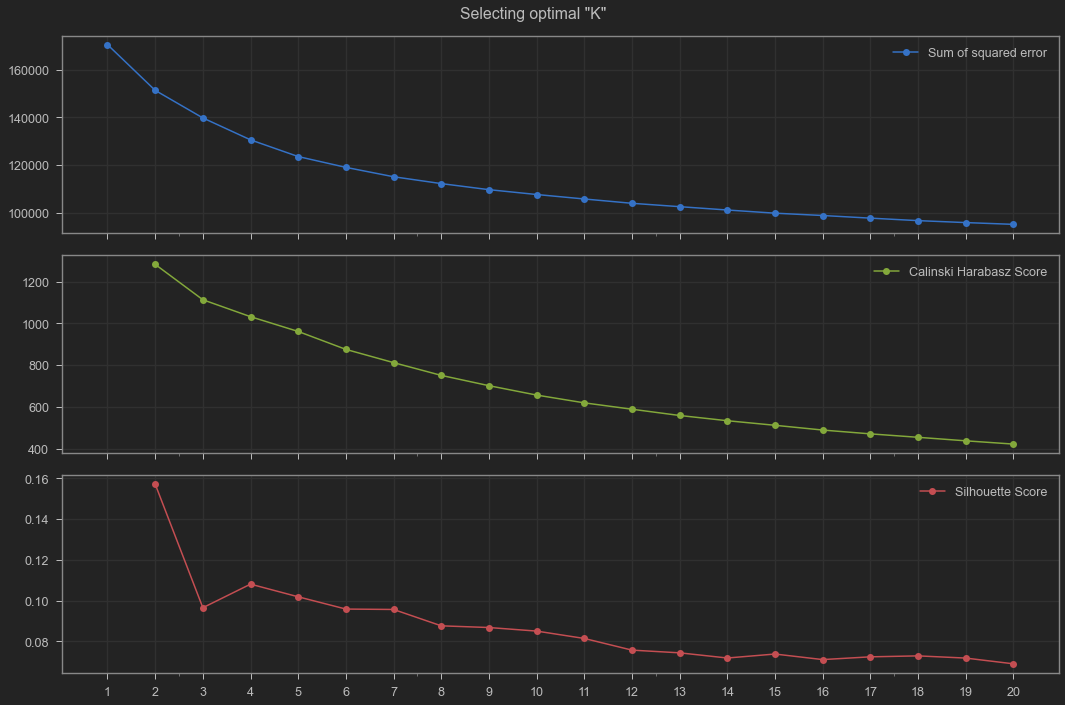

In [35]:
search_range = range(1, 21)
report = {}
for k in search_range:
    temp_dict = {}
    kmeans = KMeans(init='k-means++',
                    algorithm='auto',
                    n_clusters=k,
                    max_iter=1000,
                    random_state=1,
                    verbose=0).fit(X_segmentation)
    inertia = kmeans.inertia_
    temp_dict['Sum of squared error'] = inertia
    try:
        cluster = kmeans.predict(X_segmentation)
        chs = metrics.calinski_harabasz_score(X_segmentation, cluster)
        ss = metrics.silhouette_score(X_segmentation, cluster)
        temp_dict['Calinski Harabasz Score'] = chs
        temp_dict['Silhouette Score'] = ss
        report[k] = temp_dict
    except:
        report[k] = temp_dict

report_df = pd.DataFrame(report).T
report_df.plot(figsize=(15, 10),
               xticks=search_range,
               grid=True,
               title=f'Selecting optimal "K"',
               subplots=True,
               marker='o',
               sharex=True)
plt.tight_layout()

Higher Silhouette Coefficient score relates to a model with better defined clusters. And higher Calinski-Harabasz score relates to a model with better defined clusters.

Although by looking at the visual no obvious optimal K can not be spotted.  Based on the `Silhouette Score` and `Sum of squared error` (a.k.a. Elbow plot), 5 segmentation seemed optimal for initial model. `Calinski Harabasz Score` also supports this segmentation. 

Customers are segmented by 5 groups by their characteristics. 

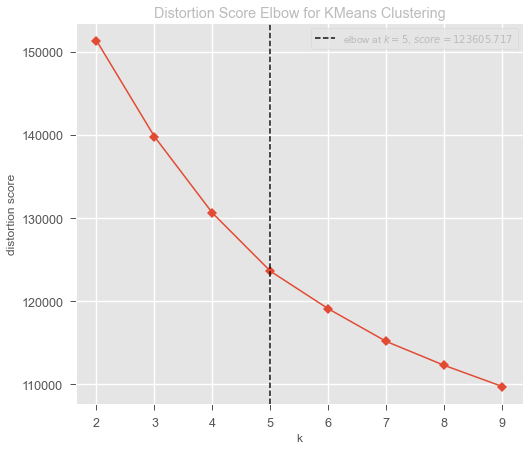

In [36]:
# using yellowbrick to get an idea about the choice of K=5
with plt.style.context('ggplot'):
    kelbow_visualizer(KMeans(random_state=1),
                      X_segmentation,
                      k=(2, 10),
                      timings=False)

Among models run for `K` from a range of 2 to 10, 5 is recommended by yellowbrick package.

In [37]:
# using MeanShift to get an estimate
bandwidth = estimate_bandwidth(X_segmentation, quantile=0.3, n_jobs=-1)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=False, n_jobs=-1, max_iter=500)
ms.fit(X_segmentation)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print(f"Number of estimated clusters : {n_clusters_}")

Number of estimated clusters : 5


Mean shift clustering aims to discover “blobs” in a smooth density of samples. It is a centroid-based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids. [(From scikit learn documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html)

Suggestion of MeanShift supports the initial choice of K=5.

### Selecting "K"

In [38]:
# setting number of cluster to 5.
n_clusters=5

In [39]:
kmeans = KMeans(
    init='k-means++',
    algorithm='auto',
    n_clusters=n_clusters,
    max_iter=1000,
    random_state=1,  # selecting random_state=1 for reproducibility
    verbose=0).fit(X_segmentation)

In [40]:
# using prediction to create a dataframe
clusters = kmeans.predict(X_segmentation)
cluster_df = X_segmentation.copy()
cluster_df['Clusters'] = clusters
cluster_df

Customer_Age  Dependent_count  Months_on_book  \
0         -0.165406         0.503368        0.384621   
1          0.333570         2.043199        1.010715   
2          0.583058         0.503368        0.008965   
3         -0.789126         1.273283       -0.241473   
4         -0.789126         0.503368       -1.869317   
...             ...              ...             ...   
10122      0.458314        -0.266547        0.509840   
10123     -0.664382        -0.266547       -1.368442   
10124     -0.290150        -1.036462        0.008965   
10125     -2.036565        -0.266547        0.008965   
10126     -0.414894        -0.266547       -1.368442   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                      0.763943               -1.327136   
1                      1.407306               -1.327136   
2                      0.120579               -1.327136   
3                     -0.522785                1.641478   
4                      0.763943               -1.327136   
...                         ...                     ...   
10122                 -0.522785               -0.337598   
10123                  0.120579               -0.337598   
10124                  0.763943                0.651940   
10125                  0.120579                0.651940   
10126                  1.407306               -0.337598   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                   0.492404      0.446622            -0.473422   
1                  -0.411616     -0.041367            -0.366667   
2                  -2.219655     -0.573698            -1.426858   
3                  -1.315636     -0.585251             1.661686   
4                  -2.219655     -0.430877            -1.426858   
...                      ...           ...                  ...   
10122               0.492404     -0.509330             0.844455   
10123               0.492404     -0.479181             1.255524   
10124               1.396424     -0.354626            -1.426858   
10125               0.492404     -0.368710            -1.426858   
10126               1.396424      0.193220             0.979433   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  Income_Category_60K_to_80K  \
0             0.488971              2.623494  ...                         1.0   
1            -0.008486              3.563293  ...                         0.0   
2            -0.445658              8.367214  ...                         0.0   
3            -0.734100              2.942843  ...                         0.0   
4            -0.302868              6.455682  ...                         1.0   
...                ...                   ...  ...                         ...   
10122        -0.584929             -0.259771  ...                         0.0   
10123        -0.591639              0.201004  ...                         0.0   
10124        -0.226632              0.269436  ...                         0.0   
10125        -0.240713             -1.026208  ...                         0.0   
10126         0.105372             -0.259771  ...                         0.0   

       Income_Category_80K_to_120K  Income_Category_Above_120K  \
0                              0.0                         0.0   
1                              0.0                         0.0   
2                              1.0                         0.0   
3                              0.0                         0.0   
4                              0.0                         0.0   
...                            ...                         ...   
10122                          0.0                         0.0   
10123                          0.0                         0.0   
10124                          0.0                         0.0   
10125                          0.0                         0.0   
10126                          0.0                         0.0   

       Income_Category_Less_than_40K  Income_Category_

In [41]:
# distribution of classes (%)
(cluster_df.Clusters.value_counts(1)*100).round(2)

2    30.23
1    26.83
3    19.75
4    13.55
0     9.65
Name: Clusters, dtype: float64

In [42]:
@interact(df=fixed(cluster_df),
          x=cluster_df.columns,
          y=cluster_df.columns,
          z=cluster_df.columns)
def plot_segments(df=cluster_df,
                  x='Customer_Age',
                  y='Months_on_book',
                  z='Credit_Limit'):
    df['Clusters'] = df['Clusters'].astype('str')
    fig = px.scatter_3d(
        df,
        x=x,
        y=y,
        z=z,
        title=
        f'{x.replace("_", " ")}, {y.replace("_", " ")} and, {z.replace("_", " ")} by Clusters',
        color='Clusters',
        template='plotly_dark')
    fig.update_traces(marker=dict(size=2))
    df['Clusters'] = df['Clusters'].astype('int')
    fig.show()

interactive(children=(Dropdown(description='x', options=('Customer_Age', 'Dependent_count', 'Months_on_book', …

Segmentation is not immediately apparent in this visualization. More insights on the segmentation is in the INTERPRET part of this analysis. Using PCA to explore the segmentation.

Using principal component analysis concept for reducing features to visualize the clusters in a three dimensional space.

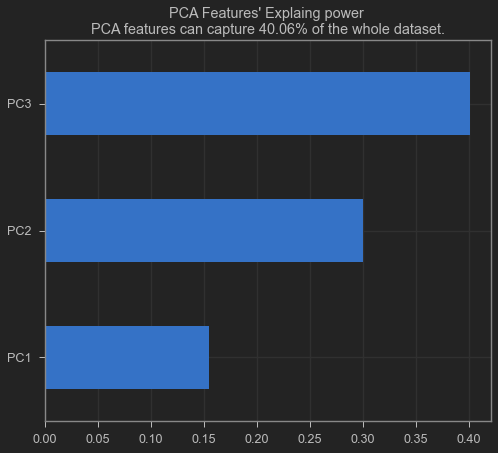

In [43]:
pca = PCA(n_components=3)
pc_feature_names = [f"PC{x}" for x in range(1, pca.n_components + 1)]
pca_data = pca.fit_transform(cluster_df)
pca_df = pd.DataFrame(pca_data, columns=pc_feature_names)
pd.Series(pca.explained_variance_ratio_.cumsum(), index=pc_feature_names).plot(
    kind='barh',
    title=
    f"""PCA Features' Explaing power \nPCA features can capture {((pca.explained_variance_ratio_.cumsum()[-1])*100).round(2)}% of the whole dataset."""
)
plt.grid()
plt.show()
pca_df['Clusters'] = clusters.astype('str')
fig = px.scatter_3d(pca_df,
                    x='PC1',
                    y='PC2',
                    z='PC3',
                    color='Clusters',
                    title='Cluster visualization with the help of PCA',
                    template='plotly_dark')
fig.update_traces(marker=dict(size=2))
fig.update_layout(width=700, height=500, bargap=0.05)
fig.show()

With only forty  percent explainability of the entire dataset by PCA, the clusters exhibit a clear separation between them in a three dimensional space. And thre is a clear separation between clusters in a two dimensional space. I am content with the selected K of 5. This will be further evaluated when performing inter cluster exploration in later part.

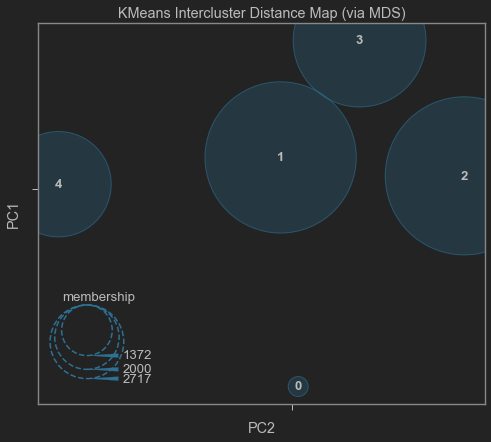

In [44]:
# Using two PC of 2
intercluster_distance(kmeans, X_segmentation, embedding='mds', random_state=12); # 'tsne'

### Feature importance

Newly created `cluster_df` is used to get the feature importance to get insights which features were often used for determining the segmentation. A Random Forest model is used to get feature importance alongside a permutation importance analysis to get the most important features.

In [45]:
X_feat_imp = cluster_df.drop(columns='Clusters').copy()
y_feat_imp = cluster_df.Clusters.copy()

In [46]:
X_feat_imp_train, X_feat_imp_test, y_feat_imp_train, y_feat_imp_test = train_test_split(
    X_feat_imp, y_feat_imp, train_size=.8)

******************************************************************************************
Train accuracy score: 0.9809
Test accuracy score: 0.9319
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       187
           1       0.96      0.92      0.94       572
           2       0.94      0.91      0.92       600
           3       0.89      0.92      0.91       395
           4       0.94      0.99      0.96       272

    accuracy                           0.93      2026
   macro avg       0.93      0.94      0.93      2026
weighted avg       0.93      0.93      0.93      2026

************************************************************


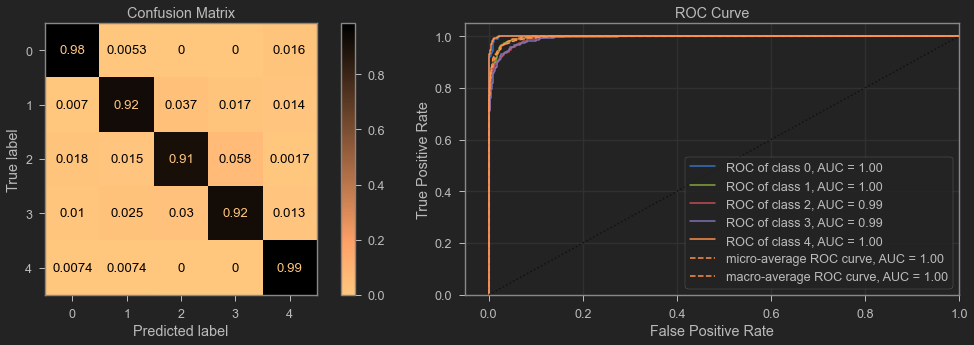

In [47]:
# Random Forest
clf_rf = RandomForestClassifier(
    n_jobs=-1,
    criterion='entropy',
    min_samples_leaf=5,
    min_samples_split=6,
    class_weight='balanced_subsample',
)
fn.model_report_multiclass(clf_rf,
                           X_feat_imp_train,
                           y_feat_imp_train,
                           X_feat_imp_test,
                           y_feat_imp_test,
                           show_train_report=False)

Model fit is good with good performance metrics and no sign of overfitting. Prediction precision is over .90 for most of the classes expect cluster 3, which differs from model run to run based on train-test split, still close to .90 most of the time.

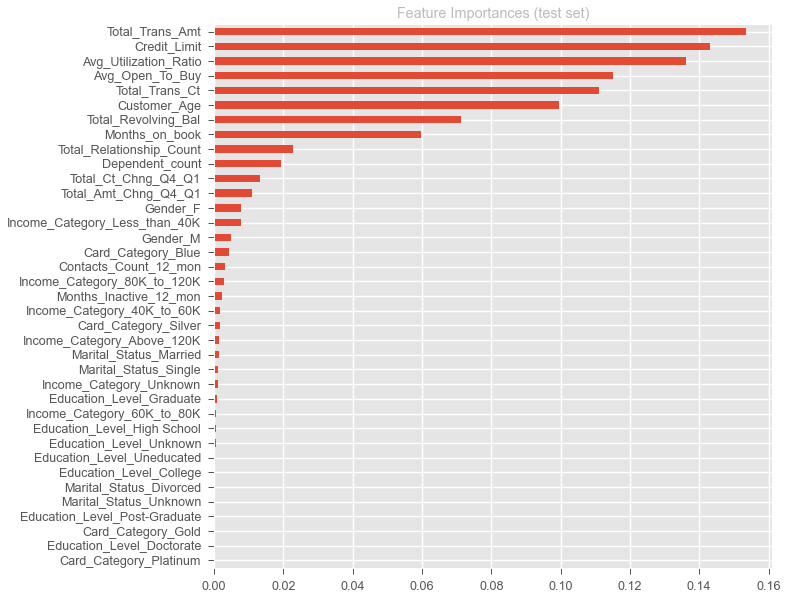

In [48]:
# Feature Importance
with plt.style.context('ggplot'):
    pd.Series(clf_rf.feature_importances_,
          index=X_feat_imp_test.columns).sort_values().plot(kind='barh',
                                                          figsize=(10, 10))
    plt.title('Feature Importances (test set)')

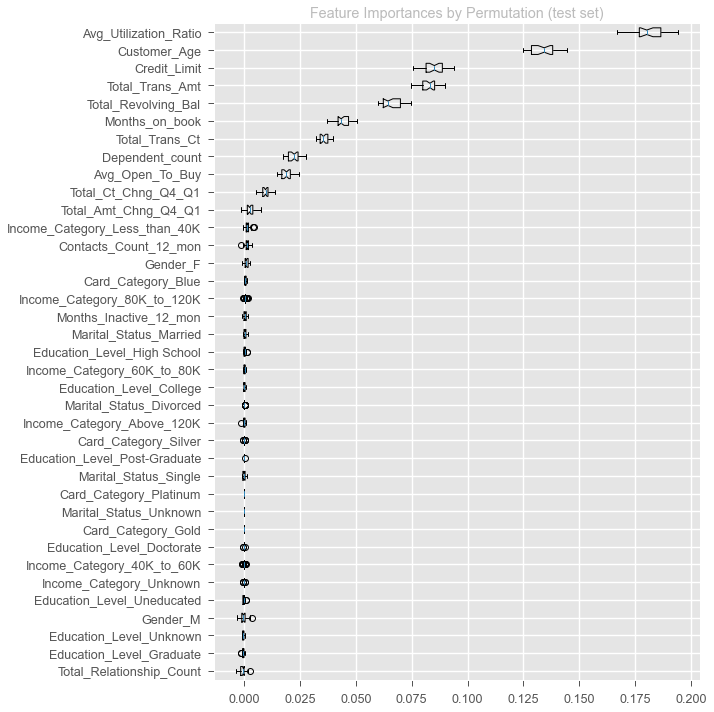

In [49]:
# Permutation Feature Importance
result = permutation_importance(clf_rf,
                                X_feat_imp_test,
                                y_feat_imp_test,
                                n_repeats=30,
                                random_state=42,
                                n_jobs=-1)
sorted_idx = result.importances_mean.argsort()
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.boxplot(result.importances[sorted_idx].T,
               notch=True,
               vert=False,
               labels=X_feat_imp_test.columns[sorted_idx])
    ax.set_title("Feature Importances by Permutation (test set)")
    fig.tight_layout()
    plt.show()

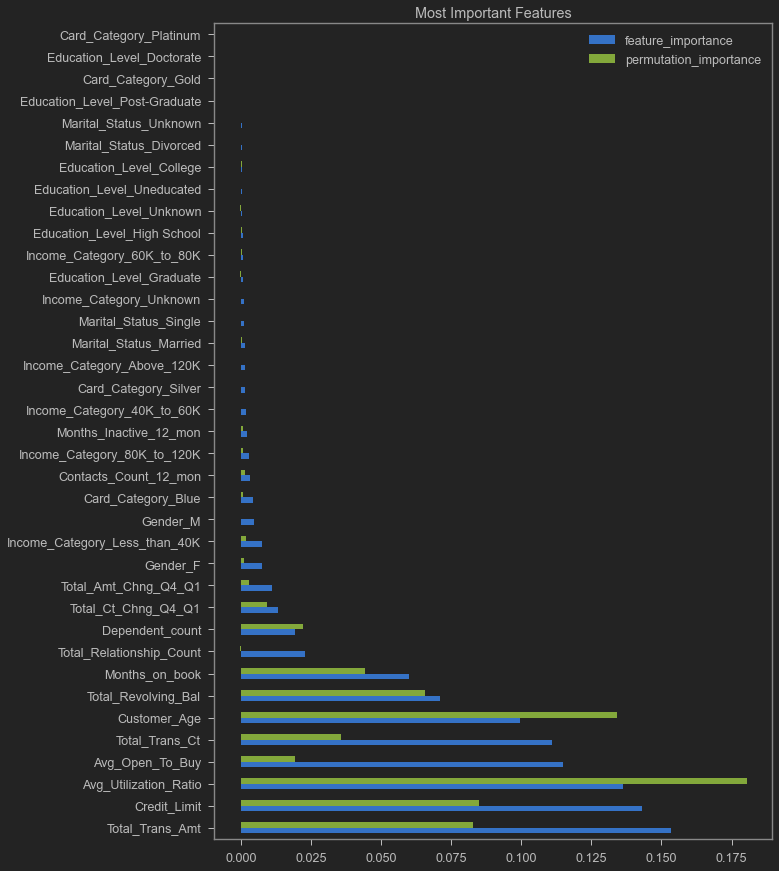

In [50]:
# fatures from the model
feature_importance = pd.Series(
    clf_rf.feature_importances_,
    index=X_feat_imp_test.columns).sort_values(ascending=False)

permutation_importance = pd.DataFrame(
    result.importances[sorted_idx].T,
    columns=X_feat_imp_test.columns[sorted_idx]).mean().sort_values(
        ascending=False)

important_features = pd.DataFrame([feature_importance,
                                   permutation_importance]).T
important_features.columns = ['feature_importance', 'permutation_importance']
important_features.plot(kind='barh',
                        figsize=(10, 15),
                        title="Most Important Features")
plt.show()

By looking at the above chart, these 10 features are selected as the most important features. Those will be explored in the later part of the notebook.

In [51]:
top_most_features = list(important_features[:10].index)
top_most_features

['Total_Trans_Amt',
 'Credit_Limit',
 'Avg_Utilization_Ratio',
 'Avg_Open_To_Buy',
 'Total_Trans_Ct',
 'Customer_Age',
 'Total_Revolving_Bal',
 'Months_on_book',
 'Total_Relationship_Count',
 'Dependent_count']

### Segmentation Characteristics

In [52]:
characteristics_df = X.copy()
characteristics_df['target'] = y.copy()
characteristics_df['Clusters'] = cluster_df.Clusters
characteristics_df

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
0                45      M                3     High School        Married   
1                49      F                5        Graduate         Single   
2                51      M                3        Graduate        Married   
3                40      F                4     High School        Unknown   
4                40      M                3      Uneducated        Married   
...             ...    ...              ...             ...            ...   
10122            50      M                2        Graduate         Single   
10123            41      M                2         Unknown       Divorced   
10124            44      F                1     High School        Married   
10125            30      M                2        Graduate        Unknown   
10126            43      F                2        Graduate        Married   

      Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
0          60K_to_80K          Blue              39                         5   
1       Less_than_40K          Blue              44                         6   
2         80K_to_120K          Blue              36                         4   
3       Less_than_40K          Blue              34                         3   
4          60K_to_80K          Blue              21                         5   
...               ...           ...             ...                       ...   
10122      40K_to_60K          Blue              40                         3   
10123      40K_to_60K          Blue              25                         4   
10124   Less_than_40K          Blue              36                         5   
10125      40K_to_60K          Blue              36                         4   
10126   Less_than_40K        Silver              25                         6   

       Months_Inactive_12_mon  ...  Credit_Limit  Total_Revolving_Bal  \
0                           1  ...       12691.0                  777   
1                           1  ...        8256.0                  864   
2                           1  ...        3418.0                    0   
3                           4  ...        3313.0                 2517   
4                           1  ...        4716.0                    0   
...                       ...  ...           ...                  ...   
10122                       2  ...        4003.0                 1851   
10123                       2  ...        4277.0                 2186   
10124                       3  ...        5409.0                    0   
10125                       3  ...        5281.0                    0   
10126                       2  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  target  Clusters  
0                    1.625                  0.061       0         4  
1                    3.714                  0.105       0         2  
2                    2.333           

In [53]:
print(f'Most frequent values in all the clusters: ')
# store data
out_dict = {}
# loop through all clusters
for cluster in range(0, n_clusters):
    # get cluster
    temp_df = characteristics_df.groupby(by='Clusters').get_group(cluster)
    # store temp data
    temp_dict = {}
    # loop though all columns
    for i in temp_df.columns:
        # get most frequent value and append
        temp_dict[i] = temp_df[i].value_counts().idxmax()
    # store in dict with cluster as key
    out_dict[cluster] = temp_dict
# convert to pandas dataframe
pd.DataFrame(out_dict)

Most frequent values in all the clusters: 


0              1              2  \
Customer_Age                         49             46             45   
Gender                                M              F              F   
Dependent_count                       2              3              3   
Education_Level                Graduate       Graduate       Graduate   
Marital_Status                  Married        Married        Married   
Income_Category           Less_than_40K  Less_than_40K  Less_than_40K   
Card_Category                      Blue           Blue           Blue   
Months_on_book                       36             36             36   
Total_Relationship_Count              2              3              3   
Months_Inactive_12_mon                3              3              3   
Contacts_Count_12_mon                 2              3              2   
Credit_Limit                    34516.0         1438.3         1438.3   
Total_Revolving_Bal                   0              0           2517   
Avg_Open_To_Buy                 34516.0         1438.3          463.0   
Total_Amt_Chng_Q4_Q1              0.749          0.699          0.744   
Total_Trans_Amt                   14802           2473           4275   
Total_Trans_Ct                       99             74             79   
Total_Ct_Chng_Q4_Q1               0.754            0.5          0.667   
Avg_Utilization_Ratio               0.0            0.0          0.598   
target                                0              0              0   
Clusters                              0              1              2   

                                      3            4  
Customer_Age                         53           50  
Gender                                F            M  
Dependent_count                       1            3  
Education_Level                Graduate     Graduate  
Marital_Status                  Married       Single  
Income_Category           Less_than_40K  80K_to_120K  
Card_Category                      Blue         Blue  
Months_on_book                       36           36  
Total_Relationship_Count              3            3  
Months_Inactive_12_mon                3            3  
Contacts_Count_12_mon                 3            2  
Credit_Limit                     1438.3      34516.0  
Total_Revolving_Bal                   0            0  
Avg_Open_To_Buy                  1438.3      34516.0  
Total_Amt_Chng_Q4_Q1              0.791        0.791  
Total_Trans_Amt                    1627         3819  
Total_Trans_Ct                       69           65  
Total_Ct_Chng_Q4_Q1                 1.0        0.667  
Avg_Utilization_Ratio               0.0          0.0  
target                                0            0  
Clusters                              3            4

In [54]:
# statistical info of each clusters
cluster_dict = dict(tuple(characteristics_df.groupby('Clusters')))
for i in range(n_clusters):
    print("Cluster " + str(i)+' description:')
    display(fn.describe_dataframe(eval("cluster_dict[" + str(i)+"]")))

Cluster 0 description:


count unique            top freq      mean      std  \
Customer_Age              977.0                                45.34     7.64   
Gender                    977.0      2              M  588                      
Dependent_count           977.0                                 2.34     1.29   
Education_Level           977.0      7       Graduate  312                      
Marital_Status            977.0      4        Married  439                      
Income_Category           977.0      6  Less_than_40K  272                      
Card_Category             977.0      4           Blue  778                      
Months_on_book            977.0                                35.21     7.66   
Total_Relationship_Count  977.0                                 2.18     1.19   
Months_Inactive_12_mon    977.0                                 2.22     0.98   
Contacts_Count_12_mon     977.0                                 2.18     0.95   
Credit_Limit              977.0                             13507.58  9921.81   
Total_Revolving_Bal       977.0                              1402.45   708.53   
Avg_Open_To_Buy           977.0                             12105.13  9935.95   
Total_Amt_Chng_Q4_Q1      977.0                                 0.78     0.11   
Total_Trans_Amt           977.0                             13144.04  2954.38   
Total_Trans_Ct            977.0                                106.0    13.03   
Total_Ct_Chng_Q4_Q1       977.0                                 0.73      0.1   
Avg_Utilization_Ratio     977.0                                 0.18     0.17   
target                    977.0                                 0.02     0.13   
Clusters                  977.0                                  0.0      0.0   

                             min      25%      50%      75%      max    dtype  \
Customer_Age                27.0     41.0     46.0     51.0     63.0    int64   
Gender                                                                 object   
Dependent_count              0.0      1.0      2.0      3.0      5.0    int64   
Education_Level                                                        object   
Marital_Status                                                         object   
Income_Category                                                        object   
Card_Category                                                          object   
Months_on_book              13.0     31.0     36.0     40.0     56.0    int64   
Total_Relationship_Count     1.0      1.0      2.0      3.0      6.0    int64   
Months_Inactive_12_mon       1.0      1.0      2.0      3.0      6.0    int64   
Contacts_Count_12_mon        0.0      1.0      2.0      3.0      6.0    int64   
Credit_Limit              2019.0   5282.0  10353.0  18341.0  34516.0  float64   
Total_Revolving_Bal          0.0   1060.0   1481.0   1907.0   2517.0    int64   
Avg_Open_To_Buy            553.0   3936.0   9027.0  17328.0  34516.0  float64   
Total_Amt_Chng_Q4_Q1        0.51      0.7     0.76     0.84     1.23  float64   
Total_Trans_Amt           4957.0  12575.0  14242.0  15124.0  18484.0    int64   
Total_Trans_Ct              63.0     97.0    106.0    116.0    139.0    int64   
Total_Ct_Chng_Q4_Q1         0.41     0.66     0.73      0.8     1.15  float64   
Avg_Utilization_Ratio        0.0     0.06     0.13     0.25      0.8  float64   
target                       0.0      0.0      0.0      0.0      1.0    int64   
Clusters                     0.0      0.0      0.0      0.0      0.0    int32   

                          nulls  
Customer_Age                  0  
Gender                        0  
Dependent_count               0  
Education_Level               0  
Marital_Status                0  
Income_Category               0  
Card_Category                 0  
Months_on_book                0  
Total_Relationship_Count      0  
Months_Inactive_12_mon        0  
Contacts_Count_12_mon         0  
Credit_Limit                  0  
Total_Revolving_Ba

Cluster 1 description:


count unique            top  freq     mean  \
Customer_Age              2717.0                                44.33   
Gender                    2717.0      2              F  1583            
Dependent_count           2717.0                                 2.58   
Education_Level           2717.0      7       Graduate   840            
Marital_Status            2717.0      4        Married  1207            
Income_Category           2717.0      6  Less_than_40K  1012            
Card_Category             2717.0      4           Blue  2646            
Months_on_book            2717.0                                34.23   
Total_Relationship_Count  2717.0                                 3.86   
Months_Inactive_12_mon    2717.0                                 2.42   
Contacts_Count_12_mon     2717.0                                 2.62   
Credit_Limit              2717.0                              5804.87   
Total_Revolving_Bal       2717.0                               310.39   
Avg_Open_To_Buy           2717.0                              5494.48   
Total_Amt_Chng_Q4_Q1      2717.0                                 0.71   
Total_Trans_Amt           2717.0                              3391.27   
Total_Trans_Ct            2717.0                                59.18   
Total_Ct_Chng_Q4_Q1       2717.0                                 0.65   
Avg_Utilization_Ratio     2717.0                                 0.05   
target                    2717.0                                 0.33   
Clusters                  2717.0                                  1.0   

                              std     min     25%     50%     75%      max  \
Customer_Age                 6.61    26.0    40.0    45.0    49.0     63.0   
Gender                                                                       
Dependent_count              1.22     0.0     2.0     3.0     3.0      5.0   
Education_Level                                                              
Marital_Status                                                               
Income_Category                                                              
Card_Category                                                                
Months_on_book               6.57    13.0    31.0    36.0    38.0     51.0   
Total_Relationship_Count     1.49     1.0     3.0     4.0     5.0      6.0   
Months_Inactive_12_mon       0.98     0.0     2.0     2.0     3.0      6.0   
Contacts_Count_12_mon        1.12     0.0     2.0     3.0     3.0      6.0   
Credit_Limit              4223.77  1438.3  2054.0  4532.0  8621.0  18432.0   
Total_Revolving_Bal        496.68     0.0     0.0     0.0   672.0   2174.0   
Avg_Open_To_Buy           4069.77   552.3  1950.0  4263.0  8017.0  18386.0   
Total_Amt_Chng_Q4_Q1         0.19     0.0    0.59    0.71    0.82     1.89   
Total_Trans_Amt           1616.66   510.0  2131.0  3350.0  4447.0  10583.0   
Total_Trans_Ct              19.36    10.0    42.0    62.0    75.0    103.0   
Total_Ct_Chng_Q4_Q1          0.21     0.0    0.51    0.65    0.78     2.22   
Avg_Utilization_Ratio        0.09     0.0     0.0     0.0    0.09     0.62   
target                       0.47     0.0     0.0     0.0     1.0      1.0   
Clusters                      0.0     1.0     1.0     1.0     1.0      1.0   

                            dtype  nulls  
Customer_Age                int64      0  
Gender                     object      0  
Dependent_count             int64      0  
Education_Level            object      0  
Marital_Status             object      0  
Income_Category            object      0  
Card_Category              object      0  
Months_on_book              int64      0  
Total_Relationship_Count    int64      0  
Months_Inactive_12_mon      int64      0  
Contacts_Count_12_mon       int64      0  
Credit_Limit              float64      0  
Total_Revolving_Bal         int64      0  
Avg_Open_To_Buy           float64      0  
Total_Amt_Chng_Q4_Q1      float64      0  
Total_Trans_Amt

Cluster 2 description:


count unique            top  freq     mean  \
Customer_Age              3061.0                                42.12   
Gender                    3061.0      2              F  2090            
Dependent_count           3061.0                                 2.65   
Education_Level           3061.0      7       Graduate   961            
Marital_Status            3061.0      4        Married  1412            
Income_Category           3061.0      6  Less_than_40K  1495            
Card_Category             3061.0      3           Blue  3039            
Months_on_book            3061.0                                31.99   
Total_Relationship_Count  3061.0                                  4.0   
Months_Inactive_12_mon    3061.0                                 2.28   
Contacts_Count_12_mon     3061.0                                 2.34   
Credit_Limit              3061.0                              3860.53   
Total_Revolving_Bal       3061.0                              1680.51   
Avg_Open_To_Buy           3061.0                              2180.02   
Total_Amt_Chng_Q4_Q1      3061.0                                  0.8   
Total_Trans_Amt           3061.0                              3709.21   
Total_Trans_Ct            3061.0                                64.95   
Total_Ct_Chng_Q4_Q1       3061.0                                 0.76   
Avg_Utilization_Ratio     3061.0                                 0.54   
target                    3061.0                                 0.08   
Clusters                  3061.0                                  2.0   

                              std     min     25%     50%     75%      max  \
Customer_Age                 6.26    26.0    38.0    43.0    47.0     58.0   
Gender                                                                       
Dependent_count              1.25     0.0     2.0     3.0     4.0      5.0   
Education_Level                                                              
Marital_Status                                                               
Income_Category                                                              
Card_Category                                                                
Months_on_book               6.51    13.0    28.0    34.0    36.0     49.0   
Total_Relationship_Count     1.49     1.0     3.0     4.0     5.0      6.0   
Months_Inactive_12_mon       1.01     0.0     2.0     2.0     3.0      6.0   
Contacts_Count_12_mon        1.08     0.0     2.0     2.0     3.0      6.0   
Credit_Limit              2568.21  1438.3  2289.0  2900.0  4502.0  16612.0   
Total_Revolving_Bal        503.87     0.0  1305.0  1662.0  2053.0   2517.0   
Avg_Open_To_Buy           2447.88     3.0   694.0  1102.0  2736.0  14424.0   
Total_Amt_Chng_Q4_Q1         0.23     0.0    0.66    0.76    0.89     2.59   
Total_Trans_Amt           1479.44   643.0  2441.0  4074.0  4625.0  14257.0   
Total_Trans_Ct              18.42    12.0    51.0    69.0    79.0    109.0   
Total_Ct_Chng_Q4_Q1          0.25     0.0    0.63    0.74    0.86     3.71   
Avg_Utilization_Ratio        0.21     0.0    0.36    0.56     0.7      1.0   
target                       0.27     0.0     0.0     0.0     0.0      1.0   
Clusters                      0.0     2.0     2.0     2.0     2.0      2.0   

                            dtype  nulls  
Customer_Age                int64      0  
Gender                     object      0  
Dependent_count             int64      0  
Education_Level            object      0  
Marital_Status             object      0  
Income_Category            object      0  
Card_Category              object      0  
Months_on_book              int64      0  
Total_Relationship_Count    int64      0  
Months_Inactive_12_mon      int64      0  
Contacts_Count_12_mon       int64      0  
Credit_Limit              float64      0  
Total_Revolving_Bal         int64      0  
Avg_Open_To_Buy           float64      0  
Total_Amt_Chng_Q4_Q1      float64      0  
Total_Trans_Amt

Cluster 3 description:


count unique            top  freq     mean  \
Customer_Age              2000.0                                55.95   
Gender                    2000.0      2              F  1155            
Dependent_count           2000.0                                  1.4   
Education_Level           2000.0      7       Graduate   616            
Marital_Status            2000.0      4        Married  1072            
Income_Category           2000.0      6  Less_than_40K   781            
Card_Category             2000.0      3           Blue  1969            
Months_on_book            2000.0                                44.59   
Total_Relationship_Count  2000.0                                 4.17   
Months_Inactive_12_mon    2000.0                                 2.41   
Contacts_Count_12_mon     2000.0                                 2.48   
Credit_Limit              2000.0                              5120.82   
Total_Revolving_Bal       2000.0                              1391.41   
Avg_Open_To_Buy           2000.0                              3729.41   
Total_Amt_Chng_Q4_Q1      2000.0                                 0.76   
Total_Trans_Amt           2000.0                              3108.56   
Total_Trans_Ct            2000.0                                55.96   
Total_Ct_Chng_Q4_Q1       2000.0                                 0.71   
Avg_Utilization_Ratio     2000.0                                 0.38   
target                    2000.0                                 0.13   
Clusters                  2000.0                                  3.0   

                              std     min      25%     50%      75%      max  \
Customer_Age                  4.7    44.0     53.0    56.0     59.0     73.0   
Gender                                                                         
Dependent_count              1.08     0.0      1.0     1.0      2.0      5.0   
Education_Level                                                                
Marital_Status                                                                 
Income_Category                                                                
Card_Category                                                                  
Months_on_book               6.08    30.0     40.0    45.0     49.0     56.0   
Total_Relationship_Count     1.43     1.0      3.0     4.0      5.0      6.0   
Months_Inactive_12_mon       1.08     0.0      2.0     2.0      3.0      6.0   
Contacts_Count_12_mon        1.11     0.0      2.0     3.0      3.0      6.0   
Credit_Limit              3763.12  1438.3   2422.5  3517.5  6909.25  23566.0   
Total_Revolving_Bal        697.38     0.0    975.0  1456.5   1892.0   2517.0   
Avg_Open_To_Buy           3725.14    10.0    962.0  2160.0  5471.25  21896.0   
Total_Amt_Chng_Q4_Q1         0.25     0.0     0.61    0.73     0.86      3.4   
Total_Trans_Amt           1588.81   530.0  1618.75  3075.0  4363.75  10170.0   
Total_Trans_Ct              20.74    10.0     37.0    58.0     74.0    104.0   
Total_Ct_Chng_Q4_Q1          0.26     0.0     0.56    0.69     0.83     3.57   
Avg_Utilization_Ratio        0.26     0.0     0.17    0.35     0.59      1.0   
target                       0.34     0.0      0.0     0.0      0.0      1.0   
Clusters                      0.0     3.0      3.0     3.0      3.0      3.0   

                            dtype  nulls  
Customer_Age                int64      0  
Gender                     object      0  
Dependent_count             int64      0  
Education_Level            object      0  
Marital_Status             object      0  
Income_Category            object      0  
Card_Category              object      0  
Months_on_book              int64      0  
Total_Relationship_Count    int64      0  
Months_Inactive_12_mon      int64      0  
Contacts_Count_12_mon       int64      0  
Credit_Limit              float64      0  
Total_Revolving_Bal         int64      0  
Avg_Open_To_Buy           float64      0  
Total_Amt_Chng

Cluster 4 description:


count unique          top  freq      mean      std  \
Customer_Age              1372.0                               46.34      6.6   
Gender                    1372.0      2            M  1231                      
Dependent_count           1372.0                                2.58     1.22   
Education_Level           1372.0      7     Graduate   399                      
Marital_Status            1372.0      4       Single   565                      
Income_Category           1372.0      6  80K_to_120K   569                      
Card_Category             1372.0      4         Blue  1004                      
Months_on_book            1372.0                               35.96     6.72   
Total_Relationship_Count  1372.0                                3.93     1.52   
Months_Inactive_12_mon    1372.0                                2.31     0.97   
Contacts_Count_12_mon     1372.0                                2.54     1.15   
Credit_Limit              1372.0                            26522.13  6887.51   
Total_Revolving_Bal       1372.0                             1192.01   792.14   
Avg_Open_To_Buy           1372.0                            25330.12  6965.65   
Total_Amt_Chng_Q4_Q1      1372.0                                0.76     0.24   
Total_Trans_Amt           1372.0                              3624.9  2162.81   
Total_Trans_Ct            1372.0                               59.58    20.18   
Total_Ct_Chng_Q4_Q1       1372.0                                0.71     0.25   
Avg_Utilization_Ratio     1372.0                                0.05     0.04   
target                    1372.0                                0.15     0.36   
Clusters                  1372.0                                 4.0      0.0   

                              min       25%      50%      75%      max  \
Customer_Age                 26.0      42.0     46.0     51.0     65.0   
Gender                                                                   
Dependent_count               0.0       2.0      3.0      3.0      5.0   
Education_Level                                                          
Marital_Status                                                           
Income_Category                                                          
Card_Category                                                            
Months_on_book               13.0      32.0     36.0     39.0     56.0   
Total_Relationship_Count      1.0       3.0      4.0      5.0      6.0   
Months_Inactive_12_mon        0.0       2.0      2.0      3.0      6.0   
Contacts_Count_12_mon         0.0       2.0      3.0      3.0      6.0   
Credit_Limit              12691.0  20229.75  26158.0  34516.0  34516.0   
Total_Revolving_Bal           0.0     653.5   1291.0   1752.5   2517.0   
Avg_Open_To_Buy           10848.0   19084.0  25086.0  32606.0  34516.0   
Total_Amt_Chng_Q4_Q1          0.0      0.62     0.74     0.88     3.36   
Total_Trans_Amt             597.0    1809.0   3420.0  4367.25  14954.0   
Total_Trans_Ct               10.0      43.0     62.0     75.0    114.0   
Total_Ct_Chng_Q4_Q1           0.0      0.56     0.68     0.81     2.43   
Avg_Utilization_Ratio         0.0      0.02     0.05     0.07     0.18   
target                        0.0       0.0      0.0      0.0      1.0   
Clusters                      4.0       4.0      4.0      4.0      4.0   

                            dtype  nulls  
Customer_Age                int64      0  
Gender                     object      0  
Dependent_count             int64      0  
Education_Level            object      0  
Marital_Status             object      0  
Income_Category            object      0  
Card_Category              object      0  
Months_on_book              int64      0  
Total_Relationship_Count    int64      0  
Months_Inactive_12_mon      int64      0  
Contacts_Count_12_mon       int64      0  
Credit_Limit              float64      0  
Total_Revolving_Bal         int64      0  
Avg_Open_To_B

#### intra cluster EDA

Exploration of clusters in an interactive plot.

In [55]:
@interact(Cluster=cluster_dict.keys())
def show_clusters(Cluster):
    fn.cluster_insights(cluster_dict[Cluster])

interactive(children=(Dropdown(description='Cluster', options=(0, 1, 2, 3, 4), value=0), Output()), _dom_class…

#### inter cluster EDA

Exploring features among clusters based on the insights from the feature importance from the previous part of the analysis. Only the most important features decided at the previous part are explored.

##### Cluster Distribution

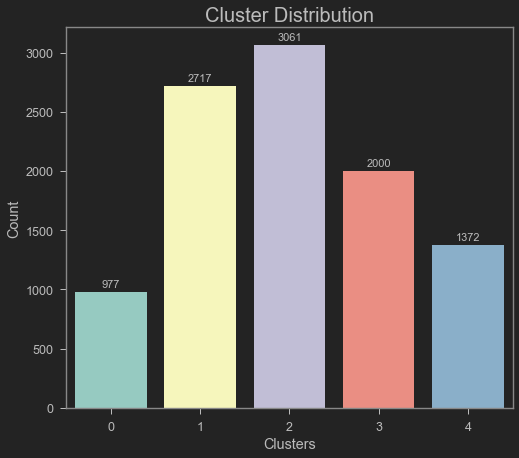

In [56]:
plot_data = characteristics_df.groupby(
    'Clusters').count()['target'].sort_index(ascending=False).reset_index()
plots = sns.barplot(y='target',
                    x='Clusters',
                    data=plot_data,
                    orient='v',
                    palette='Set3')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center',
                   va='center',
                   size=11,
                   xytext=(0, 8),
                   textcoords='offset points')
plt.ylabel("Count")
plt.title("Cluster Distribution", size=20)
plt.show()

Cluster 0 has the lowest member. Cluster 1 and 2 are fairly similar sized. Cluster 3 and 4 have moderate members.

##### Customer Age

In [57]:
fig = fn.feature_analysis_intracluster(data_frame=characteristics_df,
                                       x='Customer_Age',
                                       facet_col='Clusters',
                                       n_clusters=n_clusters,
                                       nbins=10)
fig.update_xaxes(tickmode='linear', tick0=20, dtick=10)

Cluster 4 and 1 has similar distribution. Cluster 0 is younger. Cluster 3 is distinct as it is mostly comprised of older clients. Others have similar distribution.

##### Credit Limit

In [58]:
fig = fn.feature_analysis_intracluster(
    data_frame=characteristics_df,
    x='Credit_Limit',
    facet_col='Clusters',
    n_clusters=n_clusters,
    color_discrete_sequence=px.colors.qualitative.Dark2,
    nbins=25)
fig.show()

- Cluster 0 has a well balanced distribution, it does not have lower credit limit clients.
- Cluster 1 has mostly lower credit limit clients.
- Cluster 2 and 3 has mostly same characteristics.
- Cluster 4 has the clients with mostly high credit limit.

##### Avg Utilization Ratio

In [59]:
fig = fn.feature_analysis_intracluster(
    data_frame=characteristics_df,
    x='Avg_Utilization_Ratio',
    facet_col = characteristics_df.Clusters,
    n_clusters=n_clusters,
    color_discrete_sequence=['#ff0000'],
    nbins=10)
fig.update_xaxes(tickmode='linear', tick0=0, dtick=.20)
fig.show()

- Cluster 0 shows good utilization ratio, with some 0.
- Cluster 1 has mostly less utilization ratio.
- Cluster 2 and 3 has similar utilization. Cluster 2 does not have many 0's.
- Cluster 4 has low utilization of credit.

##### Months on book

In [60]:
fig = fn.feature_analysis_intracluster(
    data_frame=characteristics_df,x='Months_on_book',
    facet_col='Clusters',
    n_clusters=n_clusters,
    color_discrete_sequence=['rgb(135, 197, 95)'])
fig.update_xaxes(tickmode='linear', tick0=10, dtick=10)
fig.show()

All of them show similar spread except Cluster 3, they are the most loyal clients.

##### Total_Trans_Amt

In [61]:
fig = fn.feature_analysis_intracluster(data_frame=characteristics_df,
    x='Total_Trans_Amt',
    facet_col='Clusters',
    n_clusters=n_clusters,
    color_discrete_sequence=['rgb(201, 219, 116)'])
fig.show()

Cluster 0 has highest transaction amount. Rest of the has similar pattern.

##### Avg_Open_To_Buy


In [62]:
fig = fn.feature_analysis_intracluster(data_frame=characteristics_df,
                                       x='Avg_Open_To_Buy',
                                       facet_col='Clusters',
                                       n_clusters=n_clusters,
                                       color_discrete_sequence=['chocolate'])
fig.show()

- Cluster 0 has a well spread.
- Cluster  1, 2, 3 are mostly similar.
- Cluster 4 has most open to buy available.

##### Total_Trans_Ct

In [63]:
fig = fn.feature_analysis_intracluster(data_frame=characteristics_df,
                                       x='Total_Trans_Ct',
                                       facet_col='Clusters',
                                       n_clusters=n_clusters,
                                       color_discrete_sequence=['skyblue'])
fig.update_xaxes(tickmode='linear', tick0=0, dtick=10)
fig.show()

- Cluster 0 is the most frequent user.
- rest of the clusters have similar spread.

##### Total_Revolving_Bal

In [64]:
fig = fn.feature_analysis_intracluster(data_frame=characteristics_df,
                                       x='Total_Revolving_Bal',
                                       facet_col='Clusters',histnorm='density',
                                       n_clusters=n_clusters,
                                       nbins=10,
                                       color_discrete_sequence=['tomato'])
fig.update_xaxes(tickmode='linear', tick0=0, dtick=500)
fig.show()

- Cluster 0 has even distribution.
- Cluster 1 has mostly low revolving balance.
- Cluster 2 does not include low revolving balance clients.
- Cluster 3 and 4 has similar distribution.

##### Total_Relationship_Count

In [65]:
fig = fn.feature_analysis_intracluster(data_frame=characteristics_df,
                                       x='Total_Relationship_Count',
                                       facet_col='Clusters',
                                       n_clusters=n_clusters,
                                       color_discrete_sequence=['turquoise'])
fig.update_xaxes(tickmode='linear', tick0=0, dtick=1)
fig.show()

Cluster 0 mostly comprised of lower relationship count clients. Rest of the Clusters has similar distributions.

##### Dependent_count

In [66]:
fig = fn.feature_analysis_intracluster(data_frame=characteristics_df,
                                       x='Dependent_count',
                                       facet_col='Clusters',
                                       n_clusters=n_clusters,
                                       color_discrete_sequence=['orangered'])
fig.update_xaxes(tickmode='linear', tick0=0, dtick=1)
fig.show()

All of them are mostly similar.

##### with churn info

All the features are explored with respect of churning.

In [67]:
@interact(Cluster=fixed(characteristics_df),
          feature=characteristics_df.columns)
def show_clusters(Cluster, feature='Customer_Age'):
    fig = px.histogram(Cluster,
                       x=feature,
                       marginal="box",
                       template='presentation',
                       color='Clusters',
                       facet_col='target',
                       color_discrete_sequence=px.colors.qualitative.Dark2,
                       barmode='group',
                       title=f'"{feature}" seperated by Clusters',
                       hover_data=Cluster)
    fig.show()
    pass

interactive(children=(Dropdown(description='feature', options=('Customer_Age', 'Gender', 'Dependent_count', 'E…

In [68]:
@interact(Cluster=fixed(characteristics_df),
          feature=characteristics_df.columns)
def show_clusters(Cluster, feature='Customer_Age'):
    fig = px.histogram(
        data_frame=Cluster,
        x=feature,
        marginal="box",
        template='presentation',
        color='target',
        facet_col='Clusters',
        color_discrete_sequence=px.colors.qualitative.Dark2,
        barmode='group',
        category_orders={'Clusters': list(np.arange(0, n_clusters))},
        title=f'"{feature.replace("_"," ")}" seperated by Clusters',
        hover_data=Cluster)
    fig.update_xaxes(showline=True,
                     linewidth=1,
                     linecolor='black', title={'text': ''})
#     fig.update_yaxes(title={'text': ''})
    fig.update_layout(annotations=list(fig.layout.annotations) + [
        go.layout.Annotation(x=0.5,
                             y=-0.22,
                             font=dict(size=14),
                             showarrow=False,
                             text=f"{feature}s",
                             textangle=0,
                             xref="paper",
                             yref="paper")
    ])
    fig.show()
    pass

interactive(children=(Dropdown(description='feature', options=('Customer_Age', 'Gender', 'Dependent_count', 'E…

Summary of exploring clusters by the most important features.

<br>

|  Variable  | Cluster 0 | Cluster 1 | Cluster 2 | Cluster 3 | Cluster 4 | Churn | Comment |  Description  |
|---|---|---|---|---|---|---|---|---|
|  Avg_Open_To_Buy  | spread | low | low | low | high value | 1 | Majority values   are low |  Open to Buy Credit Line (Average of last 12   months)  |
|  Avg_Utilization_Ratio  | low utilization | minimal low utilization | no low utilization ratio | med utilization | low utilization | 1 | Majority values are low |  Average Card Utilization Ratio  |
|  Card_Category  |  |  |  |  |  | 1 | High class   imbalance to comment | Type   of Card (Blue, Silver, Gold, Platinum)  |
|  Contacts_Count_12_mon  |  |  |  |  |  | 1 | 3 |  No. of Contacts in the last 12 months  |
|  Credit_Limit  | all clients   from2k  | mostly low   limit | 2k to 4k, no   high limit |  | high limit,   above 14k | 1 |  |  Credit Limit on the Credit Card  |
|  Customer_Age  | similar | similar | similar | older | similar | 3 |  | Customer's Age in Years  |
|  Dependent_count  | spread | spread | spread | low | spread | 1 | count 3 and 4   is risky |  Number of dependents  |
|  Education_Level  | Graduate | Graduate | College | College | Uneducated | 1 | Graduates >HS >= Unknown>=Uneducated, PG and PhD   is less likely | Educational Qualification of the account   holder (example: high school, college graduate, etc.)  |
|  Gender  | M | F | F | F | M | 1 | Females is   risky | M=Male,   F=Female  |
|  Income_Category  | Less_than_40K | 40K_to_60K | 40K_to_60K | Less_than_40K | Unknown | 1 | Less than 40K | Annual Income Category of the account   holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K,   Unknown)  |
|  Marital_Status  | Unknown | Single | Married | Married | Unknown | 1 | Majority values   is Married | Married,   Single, Unknown , Divorced |
|  Months_Inactive_12_mon  |  |  |  |  |  | 1 | 3 |  No. of months inactive in the last 12   months  |
|  Months_on_book  | good | similar | similar | loyal customer | similar | 3 |  | Time   of Relationship |
|  Total_Amt_Chng_Q4_Q1  |  |  |  |  |  | 1 | High frequency if transaction |  Change in Transaction Amount (Q4 over   Q1)   |
|  Total_Ct_Chng_Q4_Q1  |  |  |  |  |  | 1 |  |  Change in Transaction Count (Q4 over   Q1)   |
|  Total_Relationship_Count  | low | high | high | high | high | 1 | 2 and 3 are most   frequent |  Total no. of products held by the   customer  |
|  Total_Revolving_Bal  | spread | low | mod | spread | spread | 1 | Majority values   are low |  Total Revolving Balance on the Credit   Card  |
|  Total_Trans_Amt  | High transaction amount | low | mid amount till 5k high feq transaction | mid amount till 5k high feq transaction | mid amount till 5k med feq transaction | 1 | low amounts |  Total Transaction Amount (Last 12   months)  |
|  Total_Trans_Ct  | heavy user | moderate user | moderate user | moderate user | moderate user | 1 | Majority values   are between 30 to 50 |  Total Transaction Count (Last 12   months)  |

## Prediction

Prediction from the clustering model is used as a feature for modeling churn prediction model. Models without this feature was also experimented. Those models had a slightly worse performance. For the final modeling approach, dataset containing predictions from the kmeans model is used.

In [69]:
# appending churn labels as 'target'
cluster_df['target'] = df.Attrition_Flag.map(churn_map).copy()
cluster_df

Customer_Age  Dependent_count  Months_on_book  \
0         -0.165406         0.503368        0.384621   
1          0.333570         2.043199        1.010715   
2          0.583058         0.503368        0.008965   
3         -0.789126         1.273283       -0.241473   
4         -0.789126         0.503368       -1.869317   
...             ...              ...             ...   
10122      0.458314        -0.266547        0.509840   
10123     -0.664382        -0.266547       -1.368442   
10124     -0.290150        -1.036462        0.008965   
10125     -2.036565        -0.266547        0.008965   
10126     -0.414894        -0.266547       -1.368442   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                      0.763943               -1.327136   
1                      1.407306               -1.327136   
2                      0.120579               -1.327136   
3                     -0.522785                1.641478   
4                      0.763943               -1.327136   
...                         ...                     ...   
10122                 -0.522785               -0.337598   
10123                  0.120579               -0.337598   
10124                  0.763943                0.651940   
10125                  0.120579                0.651940   
10126                  1.407306               -0.337598   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                   0.492404      0.446622            -0.473422   
1                  -0.411616     -0.041367            -0.366667   
2                  -2.219655     -0.573698            -1.426858   
3                  -1.315636     -0.585251             1.661686   
4                  -2.219655     -0.430877            -1.426858   
...                      ...           ...                  ...   
10122               0.492404     -0.509330             0.844455   
10123               0.492404     -0.479181             1.255524   
10124               1.396424     -0.354626            -1.426858   
10125               0.492404     -0.368710            -1.426858   
10126               1.396424      0.193220             0.979433   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  \
0             0.488971              2.623494  ...   
1            -0.008486              3.563293  ...   
2            -0.445658              8.367214  ...   
3            -0.734100              2.942843  ...   
4            -0.302868              6.455682  ...   
...                ...                   ...  ...   
10122        -0.584929             -0.259771  ...   
10123        -0.591639              0.201004  ...   
10124        -0.226632              0.269436  ...   
10125        -0.240713             -1.026208  ...   
10126         0.105372             -0.259771  ...   

       Income_Category_80K_to_120K  Income_Category_Above_120K  \
0                              0.0                         0.0   
1                              0.0                         0.0   
2                              1.0                         0.0   
3                              0.0                         0.0   
4                              0.0                         0.0   
...                            ...                         ...   
10122                          0.0                         0.0   
10123                          0.0                         0.0   
10124                          0.0                         0.0   
10125                          0.0                         0.0   
10126                          0.0                         0.0   

       Income_Category_Less_than_40K  Income_Category_Unknown  \
0                                0.0                      0.0   
1                                1.0                      0.0   
2                                0.0                      0.0   
3                                1.0                      0.0   
4                                0.0                      0.0   


In [70]:
characteristics_df

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
0                45      M                3     High School        Married   
1                49      F                5        Graduate         Single   
2                51      M                3        Graduate        Married   
3                40      F                4     High School        Unknown   
4                40      M                3      Uneducated        Married   
...             ...    ...              ...             ...            ...   
10122            50      M                2        Graduate         Single   
10123            41      M                2         Unknown       Divorced   
10124            44      F                1     High School        Married   
10125            30      M                2        Graduate        Unknown   
10126            43      F                2        Graduate        Married   

      Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
0          60K_to_80K          Blue              39                         5   
1       Less_than_40K          Blue              44                         6   
2         80K_to_120K          Blue              36                         4   
3       Less_than_40K          Blue              34                         3   
4          60K_to_80K          Blue              21                         5   
...               ...           ...             ...                       ...   
10122      40K_to_60K          Blue              40                         3   
10123      40K_to_60K          Blue              25                         4   
10124   Less_than_40K          Blue              36                         5   
10125      40K_to_60K          Blue              36                         4   
10126   Less_than_40K        Silver              25                         6   

       Months_Inactive_12_mon  ...  Credit_Limit  Total_Revolving_Bal  \
0                           1  ...       12691.0                  777   
1                           1  ...        8256.0                  864   
2                           1  ...        3418.0                    0   
3                           4  ...        3313.0                 2517   
4                           1  ...        4716.0                    0   
...                       ...  ...           ...                  ...   
10122                       2  ...        4003.0                 1851   
10123                       2  ...        4277.0                 2186   
10124                       3  ...        5409.0                    0   
10125                       3  ...        5281.0                    0   
10126                       2  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  target  Clusters  
0                    1.625                  0.061       0         4  
1                    3.714                  0.105       0         2  
2                    2.333           

In [71]:
# # exporting data
# characteristics_df.to_csv(path_or_buf=f'./data/unscaled_data.csv', index=False)
# cluster_df.to_csv(path_or_buf=f'./data/scaled_data.csv', index=False)
# joblib.dump(cluster_df, filename=f'./model/scaled_data.joblib', compress=9)
# joblib.dump(characteristics_df,
#             filename=f'./model/unscaled_data.joblib',
#             compress=9)

In [72]:
# preparing X (independent variable), and y (dependent) for the model
X_additional_col = cluster_df.drop(columns='target').copy()
y_additional_col = cluster_df.target.copy()

In [73]:
# train test split size of 80%
X_train_pr, X_test_pr, y_train, y_test = train_test_split(X_additional_col,
                                                          y_additional_col,
                                                          train_size=.8)

In [74]:
# creating an instance of SMOTENC using feature list defined at the SCRUB section
oversampling1 = SMOTENC(categorical_features=smotenc_features, n_jobs=-1)

In [75]:
# oversampling X based on y
X_train_pr_os, y_train_encoded_os = oversampling1.fit_sample(X_train_pr, y_train)

### Baseline model

In [76]:
base_model = DummyClassifier(strategy='stratified')

******************************************************************************************
Train accuracy score: 0.4983
Test accuracy score: 0.5005
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Train Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.50      0.49      0.50      6807
           1       0.50      0.51      0.51      6807

    accuracy                           0.50     13614
   macro avg       0.50      0.50      0.50     13614
weighted avg       0.50      0.50      0.50     13614

************************************************************


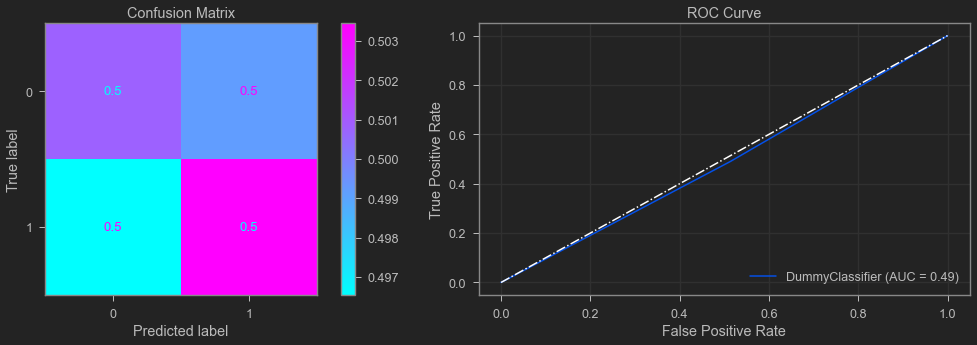

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.84      0.49      0.62      1693
           1       0.16      0.51      0.25       333

    accuracy                           0.49      2026
   macro avg       0.50      0.50      0.43      2026
weighted avg       0.73      0.49      0.56      2026

************************************************************


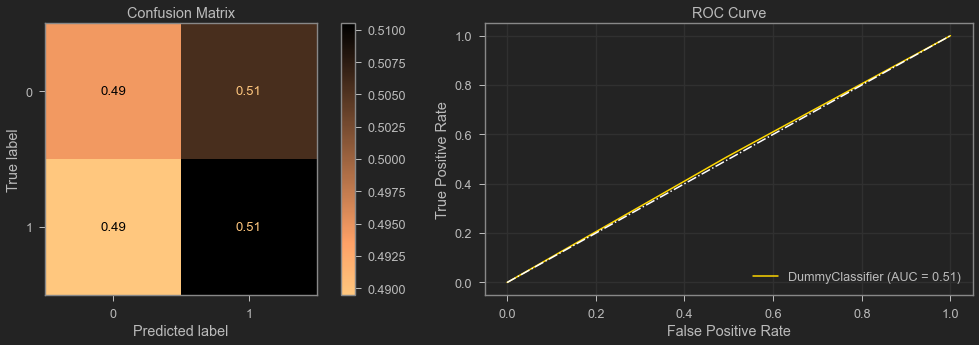

In [77]:
# using oversampled data
fn.model_report(base_model, X_train_pr_os, y_train_encoded_os, X_test_pr,
                y_test)

The baseline model is performing as par as random chance of flipping a coin for prediction.

### Logistic Regression

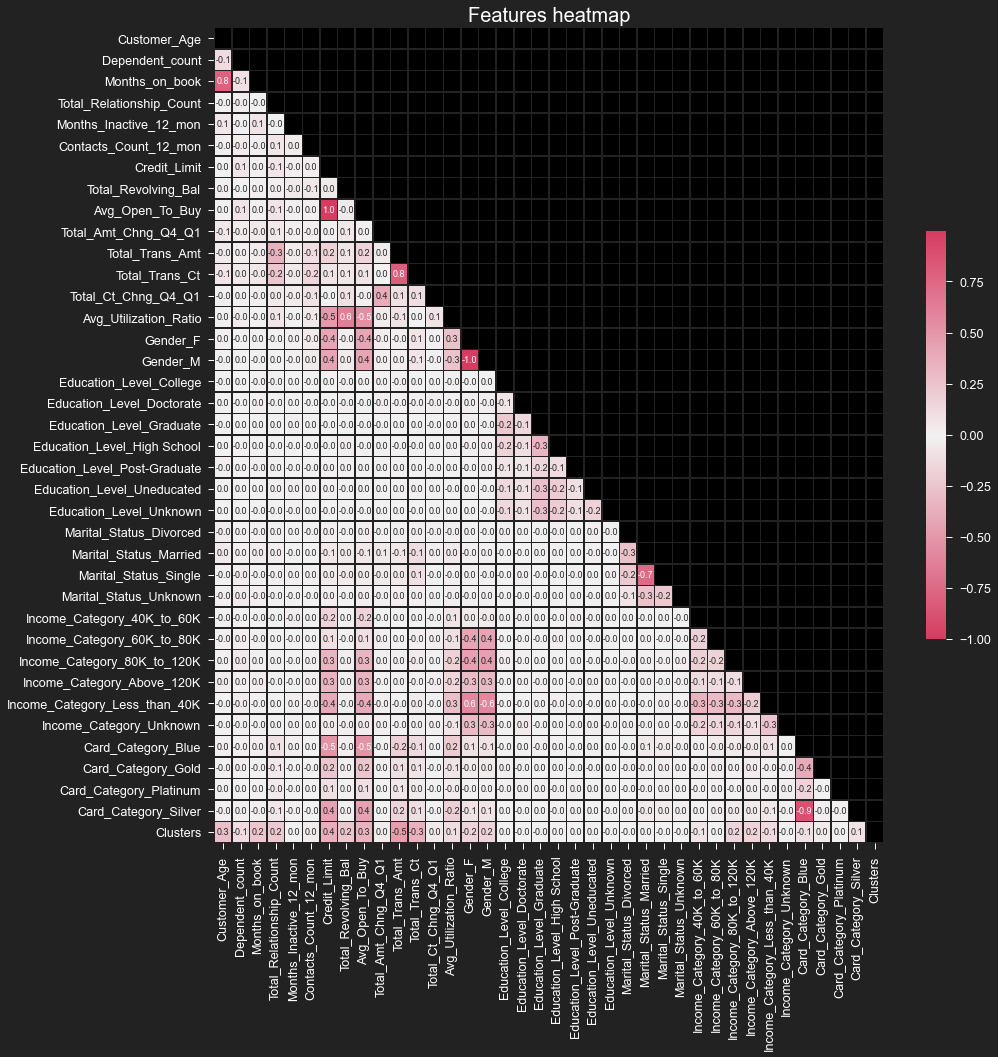

In [78]:
fn.heatmap_of_features(X_additional_col);

```'Avg_Open_To_Buy'``` with ```Credit_limit```, ```'Card_Category_Silver'``` with ```'Card_Category_Blue```, ```'Gender_M'``` with ```'Gender_F```, ```'Months_on_book'``` with ```'Customer_Age'```, ```'Total_Trans_Ct'``` with ```'Total_Trans_Amt``` features are showing high multicollinearity. Those are expected by the nature of those features.
- ```'Avg_Open_To_Buy'``` with ```Credit_limit```: Credit limit has a direct impact on a clients ability to spend. It is a positive relationship.
- ```'Card_Category_Silver'``` with ```'Card_Category_Blue```: This is interesting. Blue and Silver cards are the two most common type of credit card. There is a strong negative relationship.
- ```'Gender_M'``` with ```'Gender_F```: Binary category. 
- ```'Months_on_book'``` with ```'Customer_Age'```: Customers age has a impact on how long they can be a customer of the bank. Older they are, more time they have to be a customer.
-```'Total_Trans_Ct'``` with ```'Total_Trans_Amt```: Very closely related feature. 80% correlation is not that horrible.

In [79]:
fn.drop_features_based_on_correlation(X_additional_col)

{'Avg_Open_To_Buy',
 'Card_Category_Silver',
 'Gender_M',
 'Months_on_book',
 'Total_Trans_Ct'}

Multicollinearity undermines the statistical significance of an independent variable. Here it is important to point out that multicollinearity does not affect the model's predictive accuracy. Choosing not to deal with this issue right now.

In [80]:
# dropped first from OHE using cluster prediction
X_log_reg = X.copy()
X_log_reg['cluster'] = clusters
X_log_reg['cluster'] = X_log_reg['cluster'].astype('str')

X_train_log_reg, y_train_log_reg, X_test_log_reg, y_test_log_reg = fn.dataset_processor(
    X_log_reg, y, verbose=0, OHE_drop_option='first')

******************************************************************************************
Train accuracy score: 0.9046
Test accuracy score: 0.8801
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1689
           1       0.61      0.75      0.68       337

    accuracy                           0.88      2026
   macro avg       0.78      0.83      0.80      2026
weighted avg       0.89      0.88      0.88      2026

************************************************************


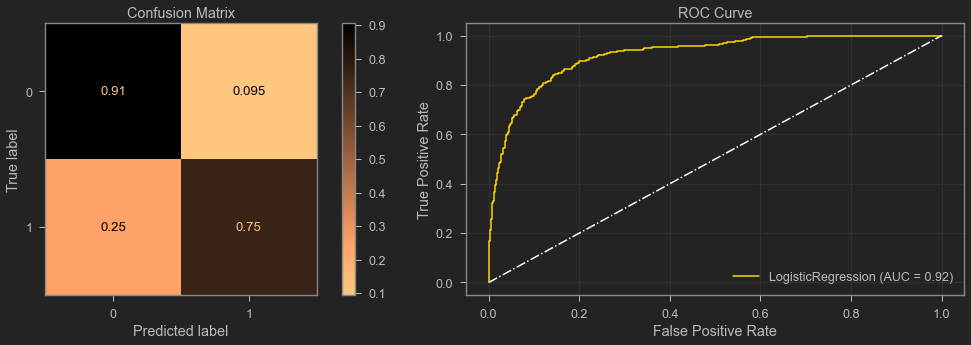

In [81]:
# with all data
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')
# score of logistic regression classifier
fn.model_report(logreg,
                X_train_log_reg,
                y_train_log_reg,
                X_test_log_reg,
                y_test_log_reg,
                show_train_report=False)

Model is not good enough to predict target class 1, churned customer.  Although accuracy is good.

******************************************************************************************
Train accuracy score: 0.9032
Test accuracy score: 0.8825
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1689
           1       0.62      0.75      0.68       337

    accuracy                           0.88      2026
   macro avg       0.78      0.83      0.80      2026
weighted avg       0.89      0.88      0.89      2026

************************************************************


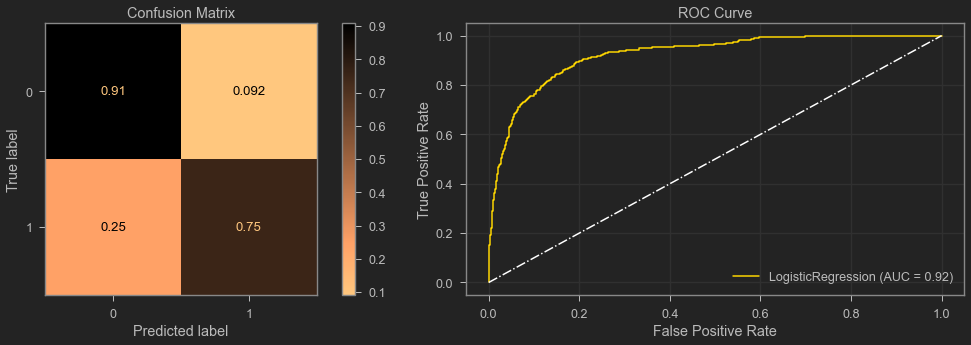

In [84]:
# dropping all the correlated features
logreg_1 = LogisticRegression(max_iter=1000, class_weight='balanced')
# score of logistic regression classifier
fn.model_report(logreg_1,
                X_train_log_reg.drop(columns=['Gender_M', 'Months_on_book']),
                y_train_log_reg,
                X_test_log_reg.drop(columns=['Gender_M', 'Months_on_book']),
                y_test_log_reg,
                show_train_report=False)

The accuracy is good enough. But the the residual must be crazy as indicated by the f-1 and precision values.
Supports my previous point about model performance. Outlier removal is next. Not pursuing that because data loss will be very high as there are lots of recurring values for the numeric values (lots of zeros) for both IQR and Z-score based approach for outlier removal.

<strong>Critical features for churning</strong>:

Odds ratios are used to measure the relative odds of the occurrence of the outcome, given a factor of interest [[Bland JM, Altman DG.(2000), The odds ratio]](https://www.bmj.com/content/bmj/320/7247/1468.1.full.pdf). The odds ratio is used to determine whether a particular attribute is a risk factor or protective factor for a particular class and the magnitude of percentage effect is used to compare the various risk factors for that class. The positive percentage effect means that the factor is positively correlated with churn and vice versa. 

The odds ratio and percentage effect of each feature are estimated as $\mathbf{OddsRatio} = e^{\Theta }$ and $\mathbf{Effect (\%)} = 100 * (OddsRatio - 1)$, where $\Theta$ is the value of weight of each feature in Logistic Regression model. If the effect is positive, the greater the factor, the likely that the client will churn, those factors are considered as risk factors. While if the effect is negative, the greater the factor, the greater the possibility that the customer will not churn, and can be considered as protective factors. This is a Bayesian approach for identifying feature importance. 

In [85]:
churn_feature = pd.DataFrame(
    logreg.coef_,columns=X_train_log_reg.columns).T
churn_feature.columns = ['weights']
churn_feature['odds_ratio'] = np.exp(churn_feature['weights'])
churn_feature['effect'] = 100 * (churn_feature['odds_ratio'] - 1)
churn_feature

weights  odds_ratio       effect
Customer_Age                   0.202600    1.224583    22.458276
Dependent_count                0.076432    1.079428     7.942849
Months_on_book                -0.071580    0.930922    -6.907836
Total_Relationship_Count      -0.713739    0.489809   -51.019067
Months_Inactive_12_mon         0.538011    1.712598    71.259752
Contacts_Count_12_mon          0.535978    1.709119    70.911902
Credit_Limit                   0.268250    1.307675    30.767457
Total_Revolving_Bal           -0.437024    0.645956   -35.404405
Avg_Open_To_Buy                0.307464    1.359971    35.997135
Total_Amt_Chng_Q4_Q1          -0.200003    0.818729   -18.127130
Total_Trans_Amt                2.683227   14.632238  1363.223757
Total_Trans_Ct                -3.411589    0.032989   -96.701126
Total_Ct_Chng_Q4_Q1           -0.696744    0.498205   -50.179502
Avg_Utilization_Ratio         -0.025369    0.974950    -2.504956
Gender_M                      -0.606366    0.545329   -45.467083
Education_Level_Doctorate     -2.390150    0.091616   -90.838409
Education_Level_Graduate      -1.914202    0.147459   -85.254051
Education_Level_High School   -2.188521    0.112082   -88.791758
Education_Level_Post-Graduate -2.752172    0.063789   -93.621085
Education_Level_Uneducated    -2.348607    0.095502   -90.449786
Education_Level_Unknown       -2.320679    0.098207   -90.179308
Marital_Status_Married        -1.153530    0.315521   -68.447898
Marital_Status_Single         -0.851991    0.426565   -57.343500
Marital_Status_Unknown        -1.626720    0.196573   -80.342665
Income_Category_60K_to_80K    -1.828942    0.160583   -83.941663
Income_Category_80K_to_120K   -1.435637    0.237964   -76.203628
Income_Category_Above_120K    -1.497907    0.223598   -77.640225
Income_Category_Less_than_40K -0.557948    0.572382   -42.761784
Income_Category_Unknown       -1.734102    0.176559   -82.344124
Card_Category_Gold            -0.928712    0.395062   -60.493777
Card_Category_Platinum        -0.376188    0.686473   -31.352708
Card_Category_Silver          -1.325415    0.265693   -73.430735
cluster_1                      3.747758   42.425861  4142.586081
cluster_2                      3.222978   25.102754  2410.275377
cluster_3                      2.588146   13.305075  1230.507459
cluster_4                      2.512005   12.329624  1132.962408

 Greater risk factors are `Customer_Age, Credit_Limit`, `Avg_Open_To_Buy`, `Contacts_Count_12_mon`, `Months_Inactive_12_mon`. Cluster 1 is the most likely to churn.

In [87]:
churn_feature = pd.DataFrame(
    logreg_1.coef_,
    columns=X_train_log_reg.drop(
        columns=['Gender_M', 'Months_on_book']).columns).T
churn_feature.columns = ['weights']
churn_feature['odds_ratio'] = np.exp(churn_feature['weights'])
churn_feature['effect'] = 100 * (churn_feature['odds_ratio'] - 1)
churn_feature

weights  odds_ratio       effect
Customer_Age                   0.169362    1.184549    18.454939
Dependent_count                0.092034    1.096402     9.640225
Total_Relationship_Count      -0.708161    0.492549   -50.745066
Months_Inactive_12_mon         0.533956    1.705667    70.566652
Contacts_Count_12_mon          0.525161    1.690732    69.073151
Credit_Limit                   0.246204    1.279161    27.916068
Total_Revolving_Bal           -0.453199    0.635592   -36.440813
Avg_Open_To_Buy                0.286892    1.332280    33.228012
Total_Amt_Chng_Q4_Q1          -0.201614    0.817411   -18.258924
Total_Trans_Amt                2.642947   14.054559  1305.455938
Total_Trans_Ct                -3.384232    0.033904   -96.609631
Total_Ct_Chng_Q4_Q1           -0.700182    0.496495   -50.350498
Avg_Utilization_Ratio         -0.015595    0.984526    -1.547386
Education_Level_Doctorate     -2.401720    0.090562   -90.943796
Education_Level_Graduate      -1.935874    0.144298   -85.570196
Education_Level_High School   -2.209761    0.109727   -89.027314
Education_Level_Post-Graduate -2.767894    0.062794   -93.720590
Education_Level_Uneducated    -2.360638    0.094360   -90.564004
Education_Level_Unknown       -2.332958    0.097008   -90.299161
Marital_Status_Married        -1.140814    0.319559   -68.044108
Marital_Status_Single         -0.835330    0.433732   -56.626846
Marital_Status_Unknown        -1.628805    0.196164   -80.383616
Income_Category_60K_to_80K    -2.123131    0.119656   -88.034361
Income_Category_80K_to_120K   -1.700958    0.182509   -81.749136
Income_Category_Above_120K    -1.757053    0.172553   -82.744741
Income_Category_Less_than_40K -0.327268    0.720891   -27.910944
Income_Category_Unknown       -1.453010    0.233865   -76.613460
Card_Category_Gold            -0.857378    0.424273   -57.572696
Card_Category_Platinum        -0.331995    0.717491   -28.250902
Card_Category_Silver          -1.295133    0.273862   -72.613844
cluster_1                      3.674570   39.431683  3843.168338
cluster_2                      3.190118   24.291300  2329.129958
cluster_3                      2.494671   12.117746  1111.774608
cluster_4                      2.481554   11.959841  1095.984100

### Random Forest

#### OG data

******************************************************************************************
Train accuracy score: 1.0
Test accuracy score: 0.958
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1693
           1       0.92      0.81      0.86       333

    accuracy                           0.96      2026
   macro avg       0.94      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026

************************************************************


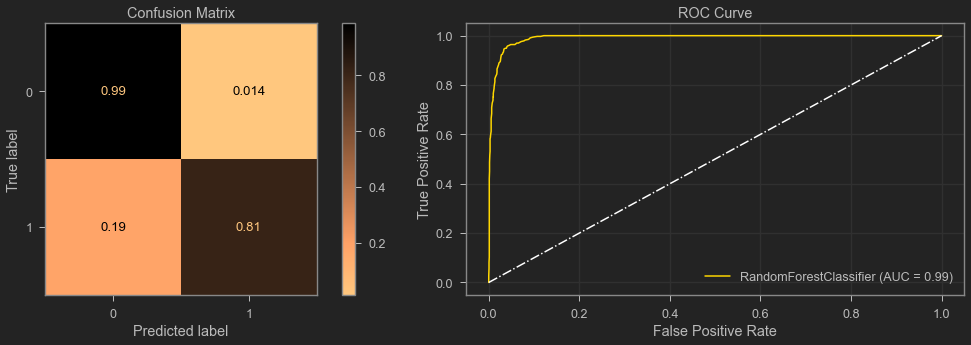

In [88]:
# not using oversampled data
clf_rf = RandomForestClassifier(n_jobs=-1)
fn.model_report(clf_rf,
             X_train_pr,
             y_train,
             X_test_pr,
             y_test,
             show_train_report=False)

#### OS data

******************************************************************************************
Train accuracy score: 1.0
Test accuracy score: 0.9585
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1693
           1       0.87      0.89      0.88       333

    accuracy                           0.96      2026
   macro avg       0.92      0.93      0.93      2026
weighted avg       0.96      0.96      0.96      2026

************************************************************


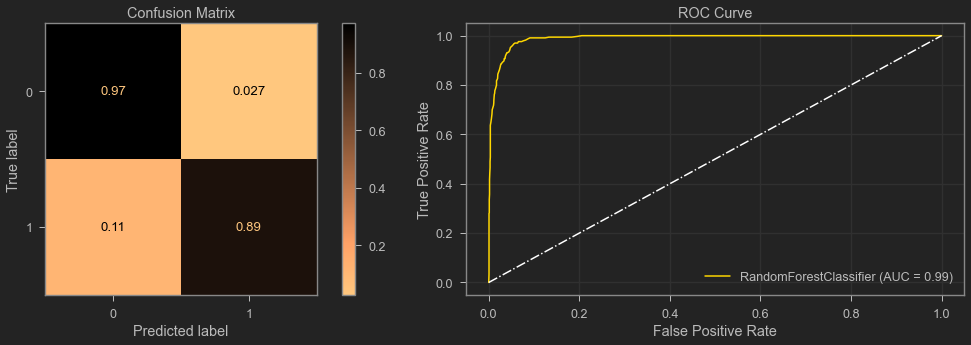

In [89]:
# using oversampled data
clf_rf = RandomForestClassifier(n_jobs=-1)
fn.model_report(clf_rf,
             X_train_pr_os,
             y_train_encoded_os,
             X_test_pr,
             y_test,
             show_train_report=False)

#### Grid Search

In [90]:
rf_clf_gs = RandomForestClassifier(n_jobs=-1, verbose=0)
params = {
    'criterion': ["gini", "entropy"],
    'max_depth': [5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [2, 3, 4],
    #     'class_weight': ["balanced", "balanced_subsample"]
}
gridsearch_rf_clf = GridSearchCV(estimator=rf_clf_gs,
                                 param_grid=params,
                                 n_jobs=-1,
                                 scoring='f1_macro')
gridsearch_rf_clf

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 3, 4]},
             scoring='f1_macro')

In [91]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    gridsearch_rf_clf.fit(X_train_pr_os, y_train_encoded_os)
print(f"Best Parameters by gridsearch:\t{gridsearch_rf_clf.best_params_}")
print(f"Best Estimator by gridsearch:\t{gridsearch_rf_clf.best_estimator_}")

rf_clf_gs_best = gridsearch_rf_clf.best_estimator_

Best Parameters by gridsearch:	{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2}
Best Estimator by gridsearch:	RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_jobs=-1)


******************************************************************************************
Train accuracy score: 0.9854
Test accuracy score: 0.9472
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1693
           1       0.80      0.90      0.85       333

    accuracy                           0.95      2026
   macro avg       0.89      0.93      0.91      2026
weighted avg       0.95      0.95      0.95      2026

************************************************************


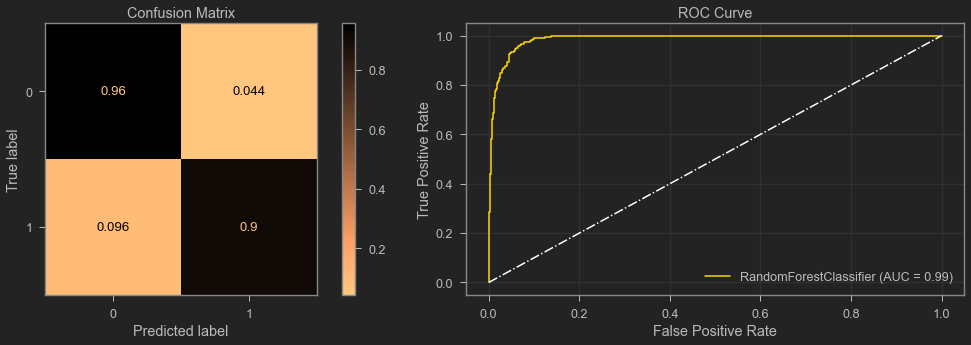

In [93]:
fn.model_report(rf_clf_gs_best, X_train_pr_os, y_train_encoded_os, X_test_pr,
             y_test,
             show_train_report=False)

### XGBoost

#### XGBClassifier

******************************************************************************************
Train accuracy score: 1.0
Test accuracy score: 0.9753
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1693
           1       0.93      0.92      0.92       333

    accuracy                           0.98      2026
   macro avg       0.96      0.95      0.95      2026
weighted avg       0.98      0.98      0.98      2026

************************************************************


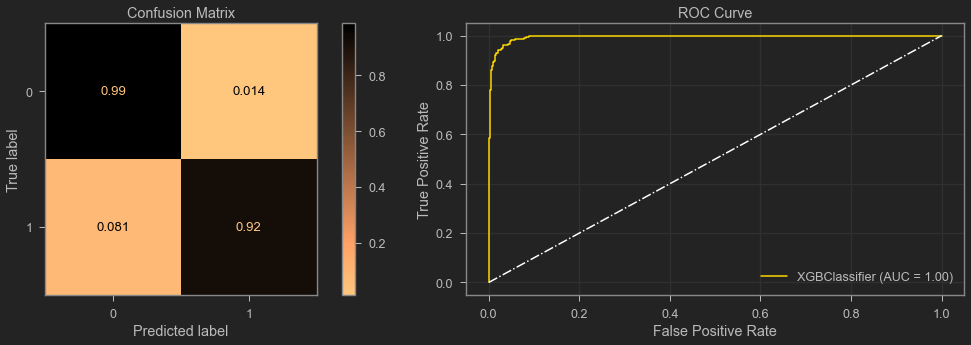

In [94]:
clf_xg = XGBClassifier(n_jobs=-1)
fn.model_report(clf_xg, X_train_pr_os, y_train_encoded_os, X_test_pr, y_test,
             show_train_report=False)

Model is not overfitting. Good test accuracy and the highest precision for target class of 1, which represents churning. (Numbers vary sightly between runs)

##### Grid search

In [96]:
xgg_clf_gs = XGBClassifier(
    n_jobs=-1, verbosity=0, objective='binary:logistic',
    eval_metric='error')  #“rank:pairwise”,“count:poisson” #'logloss','auc'
params = {
    'criterion': ["gini", "entropy"],
    'max_depth': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'class_weight': ["balanced", "balanced_subsample"],
    'ccp_alpha': [0.0, 0.05, 0.1, 0.2, 0.3],
    'importance_type':
    ["gain", "weight", "cover", "total_gain", "total_cover"],
}
gridsearch_xgg_clf_gs = GridSearchCV(
    estimator=xgg_clf_gs, param_grid=params, n_jobs=-1,
    scoring='precision')  #'roc_auc_ovr_weighted'
gridsearch_xgg_clf_gs

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, eval_metric='error',
                                     gamma=None, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estima...
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=0),
             n_jobs=-1,
             param_grid={'cc

In [97]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    gridsearch_xgg_clf_gs.fit(X_train_pr_os, y_train_encoded_os)
    
xgg_clf_gs_best = gridsearch_xgg_clf_gs.best_estimator_

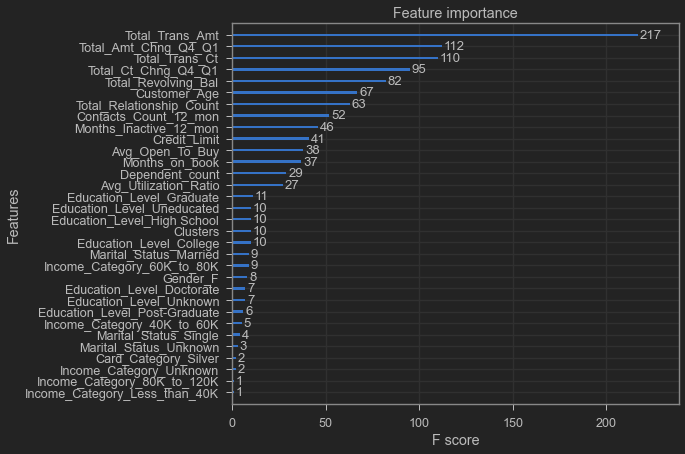

In [98]:
xgb.plot_importance(xgg_clf_gs_best);

******************************************************************************************
Train accuracy score: 0.9968
Test accuracy score: 0.9733
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1693
           1       0.91      0.93      0.92       333

    accuracy                           0.97      2026
   macro avg       0.95      0.96      0.95      2026
weighted avg       0.97      0.97      0.97      2026

************************************************************


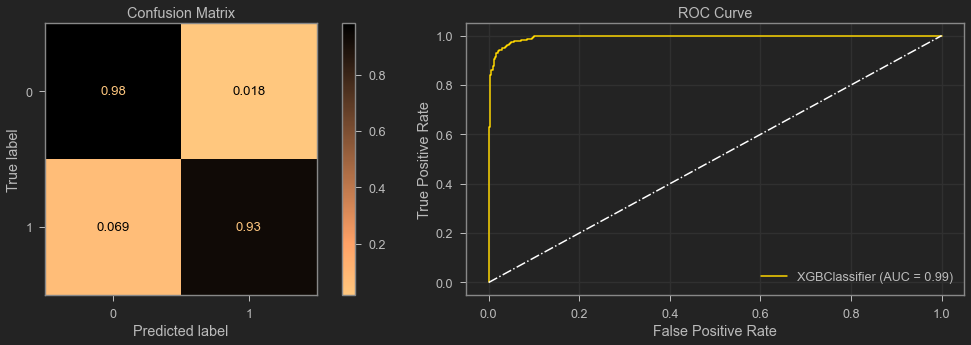

In [99]:
fn.model_report(xgg_clf_gs_best, X_train_pr_os, y_train_encoded_os, X_test_pr, y_test,
             show_train_report=False)

Model performance is mostly similar with all the extensive (expensive in term of runtime) grid search.

#### XGBRFClassifier

******************************************************************************************
Train accuracy score: 0.9489
Test accuracy score: 0.9413
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1693
           1       0.78      0.89      0.83       333

    accuracy                           0.94      2026
   macro avg       0.88      0.92      0.90      2026
weighted avg       0.95      0.94      0.94      2026

************************************************************


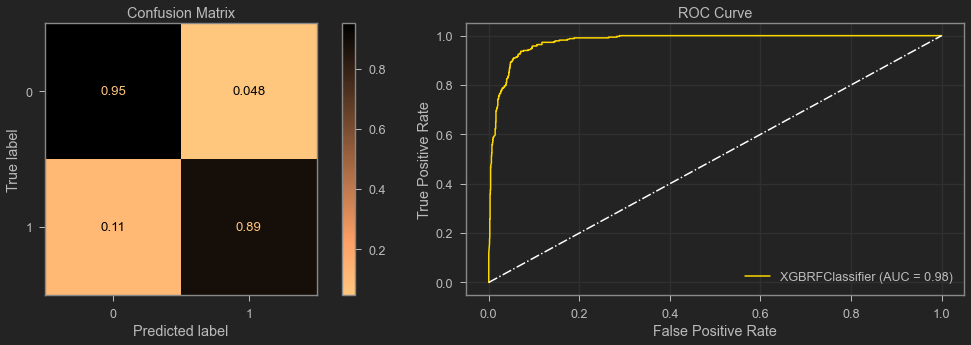

In [100]:
clf_xg_rf = XGBRFClassifier(n_jobs=-1)
fn.model_report(clf_xg_rf, X_train_pr_os, y_train_encoded_os, X_test_pr, y_test,
             show_train_report=False)

Significantly worse performance than previous model.

### Best model

`XGBClassifier` type model deemed the best model type for predicting churning. It shows best fit and model performance. Here is the model report for that model.

******************************************************************************************
Train accuracy score: 1.0
Test accuracy score: 0.9753
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1693
           1       0.93      0.92      0.92       333

    accuracy                           0.98      2026
   macro avg       0.96      0.95      0.95      2026
weighted avg       0.98      0.98      0.98      2026

************************************************************


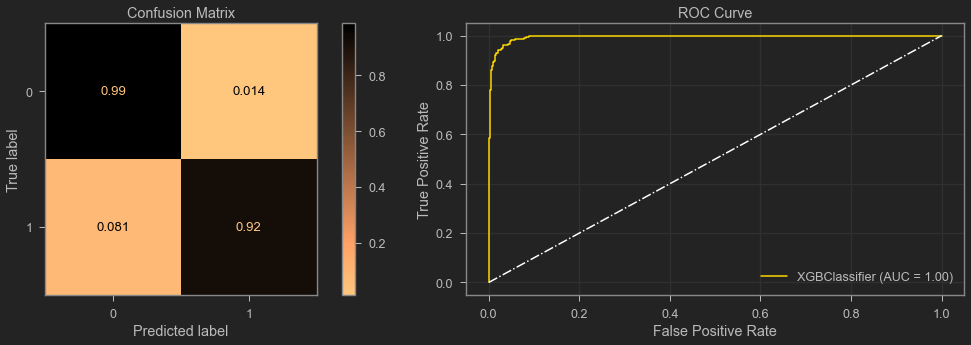

In [101]:
fn.model_report(clf_xg,
                X_train_pr_os,
                y_train_encoded_os,
                X_test_pr,
                y_test,
                show_train_report=False,
                fitted_model=True)

In [134]:
# # Save segmentation model
# joblib.dump(kmeans,
#             filename=f'./model/kmeans_segmentation_model.joblib',
#             compress=9)
# # save params of best model
# joblib.dump(clf_xg.get_params(),
#             filename=f'./model/best_model_parameters_xgb.joblib',
#             compress=9)

In [133]:
# # save model after fitting on entire dataset
# xgb_clf = XGBClassifier(**clf_xg.get_params())
# xgb_clf.fit(X_additional_col, y_additional_col)
# joblib.dump(xgb_clf,
#             filename=f'./model/xgb_clf_churn_prediction_all_data.joblib',
#             compress=9)

# INTERPRET 

## Customer Segmentation model

Based on analysis from the segmentation part and exploration of the clusters, they can be be identified as following:

- Cluster 0: Low value frequent users of services.
- Cluster 1: High risk clients segmentation.
- Cluster 2: Regular clients.
- Cluster 3: Most loyal clients. (mostly consists of older clients)
- Cluster 4: High value clients.

## Churn Prediction model

Using SHAPely values to explain this model. SHAP (SHapley Additive exPlanations) is a game-theoretic approach to explain the output of any machine learning model. [(source)](https://github.com/slundberg/shap)

In [102]:
# init shap
shap.initjs()

In [103]:
explainer = shap.TreeExplainer(clf_xg)
shap_values = explainer.shap_values(X_test_pr)

Features are sorted by the sum of SHAP value magnitudes over all samples. It also shows the distribution of the impacts each feature has. The color represents the feature value:

- red indicating high 
- blue indicating low.

Here high represents category 1 (Client Churn). 

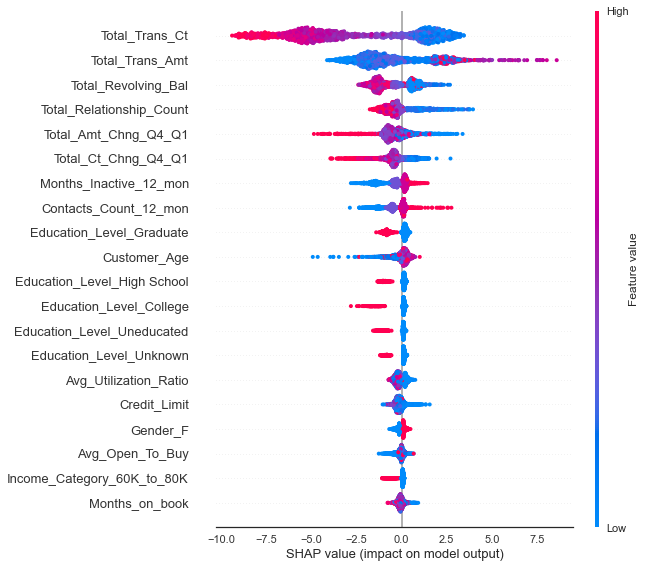

In [104]:
with plt.style.context('seaborn-white'):
    shap.summary_plot(shap_values, X_test_pr)

| Feature | Observation |
|---|---|
|  Total_Trans_Ct  | Low   value means higher risk of churning |
|  Total_Trans_Amt  | Above agerage value means higher risk of   churning |
|  Total_Revolving_Bal  | Low   value means higher risk of churning |
|  Total_Relationship_Count  | More relationship indicates more  chance of churning |
|  Total_Amt_Chng_Q4_Q1  | Low   value means higher risk of churning |
|  Total_Ct_Chng_Q4_Q1  | Low value means higher risk of churning |
|  Months_Inactive_12_mon  | Higher   value means higher risk of churning |
|  Contacts_Count_12_mon  | Higher value means higher risk of   churning |

And so on.

In [105]:
# feature wights used by the XGBClassifier model
eli5.format_as_dataframe(eli5.explain_weights(
    clf_xg, feature_names=list(X_test_pr.columns)))

feature    weight
0                  Total_Trans_Ct  0.250433
1             Total_Revolving_Bal  0.079447
2        Total_Relationship_Count  0.079296
3                 Total_Trans_Amt  0.052821
4          Months_Inactive_12_mon  0.046896
5         Education_Level_Unknown  0.042242
6                        Gender_F  0.039837
7     Income_Category_80K_to_120K  0.033957
8         Education_Level_College  0.032579
9             Total_Ct_Chng_Q4_Q1  0.030267
10          Contacts_Count_12_mon  0.030240
11     Education_Level_Uneducated  0.023423
12     Income_Category_60K_to_80K  0.022967
13    Education_Level_High School  0.021457
14       Education_Level_Graduate  0.018247
15  Education_Level_Post-Graduate  0.017746
16           Total_Amt_Chng_Q4_Q1  0.017545
17                   Customer_Age  0.017284
18      Education_Level_Doctorate  0.014393
19  Income_Category_Less_than_40K  0.014263

# RECOMMENDATION & CONCLUSION

Cluster 1 is the most riskiest client segmentation. They should be offered deals to make them stick with the bank.
- Their utilization ratio is low. By offering incentives like cash back offer is a viable option.
- Their credit limits are low. Based on their credit habit, they can be offered a larger credit limit.
<br>

As a rule of thumb:
- Most loyal and at risk clients are female. Marketers should target them with specific package.
- frequent smaller amount of transaction can be perceived as a red flag. When spotted, customer relationship team must act on it.
- large expenditure can be a signal for cross selling products and it is also a sign of churn.

This churn prediction model can be valuable for marketers to identify clients with higher risk of churning. This is invaluable for marketers to be able to identify potential customers as well as customers who are on verge of leaving for any reason. Simply by identifying and reaching out to them can reduce customer dissatisfaction and can retain a substantial portion of them. 

# NEXT STEPS

<strong>Modeling aspect</strong>: Gaussian Mixture Models for segmentation modeling, and Neural Network based approach for prediction model.

<strong>Business need aspect</strong>: A part of the business challenge is determining how soon you want the model to forecast. A prediction that is made too long in advance may be less accurate. A narrow prediction horizon, on the other hand, may perform better in terms of accuracy, but it may be too late to act after the consumer has made her decision.

Finally, it is critical to establish whether churn should be characterized at the product level (customers who are likely to discontinue using a certain product, such as a credit card) or at the relationship level (client likely to extricate from the bank itself). When data is evaluated at the relationship level, you gain a wider insight of the customer's perspective. Excessive withdrawals from a savings account, for example, may be used to pay for a deposit on a house or education costs. Such insights into client life events are extremely effective not just for preventing churn, but also for cross-selling complementary items that may enhance the engagement even further.
This can be done with more information about the customers if there is product level data is available.

# APPENDIX

## Environment setup

For running this locally please follow instructions from `'./assets/req/README.md'`.

## all functions and imports from the `functions.py` and `packages.py`

In [110]:
# functions used in various steps of this analysis
fn.show_py_file_content(file='./imports_and_functions/functions.py')

```python
# imports
import plotly.graph_objs as go
import matplotlib.pyplot as plt
# import plotly
# from plotly import graph_objs
from sklearn import metrics
from IPython.display import display, HTML, Markdown
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from yellowbrick.classifier.rocauc import roc_auc
import seaborn as sns
import numpy as np
import plotly.express as px

# functions


def model_report(model,
                 X_train,
                 y_train,
                 X_test,
                 y_test,
                 show_train_report=True,
                 show_test_report=True,
                 fitted_model=False,
                 cmap=['cool', 'copper_r'],
                 normalize='true',
                 figsize=(15, 5)):
    """
    Dispalys classification model report.
    Report of model performance using train-test split dataset.
    Shows train and test score, Confusion Matrix and, ROC Curve of performane of test data.
    Uses sklearn for plotting.
    
    Intended to work ONLY on model where target has properly encoded binomial class value.
    
    Parameters:
    -----------
    model : object, scikit-learn model object; no default.
    X_train : pandas.DataFrame, predictor variable training data split; no default,
    y_train : pandas.DataFrame, target variable training data split; no default,
    X_test : pandas.DataFrame, predictor variable test data split; no default,
    y_test : pandas.DataFrame, target variable test data split; no default,
    cmap : {NOT IMPLIMENTED} list of str, colormap of Confusion Matrix; default: ['cool', 'copper_r'],
        cmap of train and test data
    normalize : {NOT IMPLIMENTED} str, normalize count of Confusion Matrix; default: 'true',
        - `true` to normalize counts.
        - `false` to show raw counts.
    figsize : tuple ``(lenght, height) in inchs``, figsize of output; default: (16, 6),
    show_train_report : boolean; default: False,
        - True, to show report.
        - False, to turn off report.
    fitted_model : bool; default: False,
        - if True, fits model to train data and generates report.
        - if False, does not fits model and generates report.
        Use False for previously fitted model.

    ---version 0.9.14---
    """
    if fitted_model is False:
        model.fit(X_train, y_train)
    train = model.score(X_train, y_train)
    test = model.score(X_test, y_test)

    def str_model_(model):
        """Helper function to get model class display statement, this text conversion breaks code if 
        performed in ``model_report`` function's local space. This function is to isolate from the 
        previous function's local space."""
        str_model = str(model.__class__).split('.')[-1][:-2]
        display(
            HTML(
                f"""<strong>Report of {str_model} type model using train-test split dataset.</strong>"""
            ))

    str_model_(model)
    print(f"{'*'*90}")
    print(f"""Train accuracy score: {train.round(4)}""")
    print(f"""Test accuracy score: {test.round(4)}""")
    if abs(train - test) <= .05:
        print(
            f"    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold."
        )
    elif (train - test) > .05:
        print(
            f"    Possible Overfitting, diffrence of scores {round(abs(train-test)*100,2)}% crossed 5% thresh hold."
        )
    elif (train - test) < -.05:
        print(
            f"    Possible Underfitting, diffrence of scores {round(abs(train-test)*100,2)}% crossed 5% thresh hold."
        )
    print(f"{'*'*90}")
    print("")

    if show_train_report:
        print(f'Train Report: ')
        print(f"{'*'*60}")
        # train report
        # classification report
        print(
            metrics.classification_report(y_train,
                                          model.predict(X_train)))
        print(f"{'*'*60}")
        # Confusion matrix
        fig, ax = plt.subplots(ncols=2, figsize=figsize)
        metrics.plot_confusion_matrix(model,
                                      X_train,
                                      y_train,
                                      cmap='cool',
                                      normalize='true',
                                      ax=ax[0])
        ax[0].title.set_text('Confusion Matrix')
        # ROC curve
        metrics.plot_roc_curve(model,
                               X_train,
                               y_train,
                               color='#0450E7',
                               ax=ax[1])
        ax[1].plot([0, 1], [0, 1], ls='-.', color='white')
        ax[1].title.set_text('ROC Curve')
        plt.grid()
        plt.tight_layout()
        plt.show()

    if show_test_report:
        # train report
        # classification report
        print(f'Test Report: ')
        print(f"{'*'*60}")
        print(metrics.classification_report(y_test,
                                            model.predict(X_test)))
        print(f"{'*'*60}")
        # Confusion matrix
        fig, ax = plt.subplots(ncols=2, figsize=figsize)
        metrics.plot_confusion_matrix(model,
                                      X_test,
                                      y_test,
                                      cmap='copper_r',
                                      normalize='true',
                                      ax=ax[0])
        ax[0].title.set_text('Confusion Matrix')
        # ROC curve
        metrics.plot_roc_curve(model,
                               X_test,
                               y_test,
                               color='gold',
                               ax=ax[1])
        ax[1].plot([0, 1], [0, 1], ls='-.', color='white')
        ax[1].title.set_text('ROC Curve')
        plt.grid()
        plt.tight_layout()
        plt.show()
    pass


def dataset_processor_segmentation(X, OHE_drop_option=None, verbose=0, scaler=None):
    """Prepares data for use in Kmeans clustering algorithm.
    
    +++++++++++++++++++++
     predefined function
    +++++++++++++++++++++
    
    Parameters:
    -----------
    X : pandas.core.frame.DataFrame; no defalut, independent variables, 
    scaler : sklearn.preprocessing; default = None,
        None uses ```StandardScaler```
    OHE_drop_option : str; default = None,
        for use in sklearn.preprocessing._encoders.OneHotEncoder
        drop : {'first', 'if_binary'} or a array-like of shape (n_features,),             
        default=None, Specifies a methodology to use to drop one of the 
        categories per feature. This is useful in situations where perfectly 
        collinear features cause problems, such as when feeding the resulting 
        data into a neural network or an unregularized regression.

        However, dropping one category breaks the symmetry of the original
        representation and can therefore induce a bias in downstream models,
        for instance for penalized linear classification or regression models.

            - None : retain all features (the default).
            - 'first' : drop the first category in each feature. If only one
            category is present, the feature will be dropped entirely.
            - 'if_binary' : drop the first category in each feature with two
            categories. Features with 1 or more than 2 categories are
            left intact.
            - array : ``drop[i]`` is the category in feature ``X[:, i]`` that
            should be dropped.
    verbose : int; default = 0, 
        verbosity control. Larger value means more report. 
    
    Returns:
    --------
    X  : pandas.core.frame.DataFrame, 
    
    --- version 0.1 ---
    """
    # isolating numerical cols
    nume_col = list(X.select_dtypes('number').columns)
    if verbose > 0:
        print("Numerical columns: \n---------------------\n", nume_col)

    # isolating categorical cols
    cate_col = list(X.select_dtypes('object').columns)
    if verbose > 0:
        print('')
        print("Categorical columns: \n---------------------\n", cate_col)

    # pipeline for processing categorical features
    pipe_cate = Pipeline([('ohe',
                           OneHotEncoder(sparse=False, drop=OHE_drop_option))])
    # pipeline for processing numerical features
    if scaler is None:
        scaler = StandardScaler()
    pipe_nume = Pipeline([('scaler', scaler)])
    # transformer
    preprocessor = ColumnTransformer([('nume_feat', pipe_nume, nume_col),
                                      ('cate_feat', pipe_cate, cate_col)])
    # creating dataframes
    try:
        X_pr = pd.DataFrame(
            preprocessor.fit_transform(X),
            columns=nume_col +
            list(preprocessor.named_transformers_['cate_feat'].
                 named_steps['ohe'].get_feature_names(cate_col)))
        if verbose > 1:
            print("\n\n------")
            print(
                f"Scaler: {str(preprocessor.named_transformers_['nume_feat'].named_steps['scaler'].__class__)[1:-2].split('.')[-1]}, settings: {preprocessor.named_transformers_['nume_feat'].named_steps['scaler'].get_params()}"
            )
            print(
                f"Encoder: {str(preprocessor.named_transformers_['cate_feat'].named_steps['ohe'].__class__)[1:-2].split('.')[-1]}, settings: {preprocessor.named_transformers_['cate_feat'].named_steps['ohe'].get_params()}"
            )
            print("------")
    except:
        if verbose > 1:
            print("\n\n------")
            print(
                f"Scaler: {str(preprocessor.named_transformers_['nume_feat'].named_steps['scaler'].__class__)[1:-2].split('.')[-1]}, settings: {preprocessor.named_transformers_['nume_feat'].named_steps['scaler'].get_params()}"
            )
            print(
                f"Encoder: {str(preprocessor.named_transformers_['cate_feat'].named_steps['ohe'].__class__)[1:-2].split('.')[-1]}, settings: {preprocessor.named_transformers_['cate_feat'].named_steps['ohe'].get_params()}"
            )
            print("------")
            print("No Categorical columns found")
        X_pr = pd.DataFrame(preprocessor.fit_transform(X), columns=nume_col)
    return X_pr


def show_py_file_content(file='./imports_and_functions/functions.py'):
    """
    displays content of a py file output formatted as python code in jupyter notebook.

    Parameter:
    ==========
    file : `str`; default: './imports_and_functions/functions.py',
        path to the py file.
    """
    with open(file, 'r', encoding="utf8") as f:
        x = f"""```python
{f.read()}
```"""
        display(Markdown(x))


def model_report_multiclass(model,
                            X_train,
                            y_train,
                            X_test,
                            y_test,
                            show_train_report=True,
                            show_test_report=True,
                            fitted_model=False,
                            cmap=['cool', 'copper_r'],
                            normalize='true',
                            figsize=(15, 5)):
    """
    Dispalys model report of multiclass classification model.
    Report of model performance using train-test split dataset.
    Shows train and test score, Confusion Matrix and, ROC Curve of performane of test data. 
    Uses sklearn and yellowbrick for plotting.
    
    Parameters:
    -----------
    model : object, scikit-learn model object; no default.
    X_train : pandas.DataFrame, predictor variable training data split; no default,
    y_train : pandas.DataFrame, target variable training data split; no default,
    X_test : pandas.DataFrame, predictor variable test data split; no default,
    y_test : pandas.DataFrame, target variable test data split; no default,
    cmap : {NOT IMPLIMENTED} list of str, colormap of Confusion Matrix; default: ['cool', 'copper_r'],
        cmap of train and test data
    normalize : {NOT IMPLIMENTED} str, normalize count of Confusion Matrix; default: 'true',
        - `true` to normalize counts.
        - `false` to show raw counts.
    figsize : tuple ``(lenght, height) in inchs``, figsize of output; default: (16, 6),
    show_train_report : boolean; default: False,
        - True, to show report.
        - False, to turn off report.
    fitted_model : bool; default: False,
        - if True, fits model to train data and generates report.
        - if False, does not fits model and generates report.
        Use False for previously fitted model.

    ---version 0.9.14---
    """
    if fitted_model is False:
        model.fit(X_train, y_train)
    train = model.score(X_train, y_train)
    test = model.score(X_test, y_test)

    def str_model_(model):
        """Helper function to get model class display statement, this text conversion breaks code if 
        performed in ``model_report`` function's local space. This function is to isolate from the 
        previous function's local space."""
        str_model = str(model.__class__).split('.')[-1][:-2]
        display(
            HTML(
                f"""<strong>Report of {str_model} type model using train-test split dataset.</strong>"""
            ))

    str_model_(model)
    print(f"{'*'*90}")
    print(f"""Train accuracy score: {train.round(4)}""")
    print(f"""Test accuracy score: {test.round(4)}""")
    if abs(train - test) <= .05:
        print(
            f"    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold."
        )
    elif (train - test) > .05:
        print(
            f"    Possible Overfitting, diffrence of scores {round(abs(train-test)*100,2)}% crossed 5% thresh hold."
        )
    elif (train - test) < -.05:
        print(
            f"    Possible Underfitting, diffrence of scores {round(abs(train-test)*100,2)}% crossed 5% thresh hold."
        )
    print(f"{'*'*90}")
    print("")

    if show_train_report:
        print(f'Train Report: ')
        print(f"{'*'*60}")
        # train report
        # classification report
        print(
            metrics.classification_report(y_train,
                                          model.predict(X_train)))
        print(f"{'*'*60}")
        # Confusion matrix
        fig, ax = plt.subplots(ncols=2, figsize=figsize)
        metrics.plot_confusion_matrix(model,
                                      X_train,
                                      y_train,
                                      cmap='cool',
                                      normalize='true',
                                      ax=ax[0])
        ax[0].title.set_text('Confusion Matrix')
        # ROC curve
        _ = roc_auc(model,
                    X_train,
                    y_train,
                    classes=None,
                    is_fitted=True,
                    show=False,
                    ax=ax[1])

        ax[1].grid()
        ax[1].title.set_text('ROC Curve')
        plt.xlim([-.05, 1])
        plt.ylim([0, 1.05])
        plt.tight_layout()
        plt.show()

    if show_test_report:
        # train report
        # classification report
        print(f'Test Report: ')
        print(f"{'*'*60}")
        print(metrics.classification_report(y_test,
                                            model.predict(X_test)))
        print(f"{'*'*60}")
        # Confusion matrix
        fig, ax = plt.subplots(ncols=2, figsize=figsize)
        metrics.plot_confusion_matrix(model,
                                      X_test,
                                      y_test,
                                      cmap='copper_r',
                                      normalize='true',
                                      ax=ax[0])
        ax[0].title.set_text('Confusion Matrix')
        # ROC curve
        _ = roc_auc(model,
                    X_test,
                    y_test,
                    classes=None,
                    is_fitted=True,
                    show=False,
                    ax=ax[1])
        plt.xlim([-.05, 1])
        plt.ylim([0, 1.05])
        ax[1].grid()
        ax[1].title.set_text('ROC Curve')
        plt.tight_layout()
        plt.show()
    pass


def plot_distribution(df,
                      color='gold',
                      figsize=(16, 26),
                      fig_col=3,
                      labelrotation=45,
                      plot_title='Histogram plots of the dataset'):
    """Plots distribution of features
    
    +++++++++++++++++
     Helper function
    +++++++++++++++++

    Parameters:
    -----------
    df : pandas.DataFrame, predictor variable training data split; no default,
    color : str, default = 'gold', 
        color of bars, takes everything that seaborn takes as color option,
    figsize : tuple ``(lenght, height) in inchs``, figsize of output; default: (16, 26),
    fig_col : int; defalut = 3, Controls how many colums to plot in one row,
    labelrotation : int; default = 45, xlabel tick rotation,
    plot_title : str; default = 'Histogram plots of the dataset',
    """
    def num_col_for_plotting(row, col=fig_col):
        """
        +++ formatting helper function +++
        __________________________________
        Returns number of rows to plot

        Parameters:
        ===========
        row = int;
        col = int; default col: 3
        """
        if row % col != 0:
            return (row // col) + 1
        else:
            return row // col

    fig, axes = plt.subplots(nrows=num_col_for_plotting(len(df.columns),
                                                        col=fig_col),
                             ncols=fig_col,
                             figsize=figsize,
                             sharey=False)
    for ax, column in zip(axes.flatten(), df):
        sns.histplot(x=column, data=df, color=color, ax=ax, kde=True)
        ax.set_title(f'Histplot of {column.title()}')
        ax.tick_params('x', labelrotation=labelrotation)
        sns.despine()
        plt.tight_layout()
        plt.suptitle(plot_title, fontsize=20, fontweight=3, va='bottom')
    plt.show()
    pass


def heatmap_of_features(df, figsize=(15, 15), annot_format='.1f'):
    """
    Return a masked heatmap of the given DataFrame

    Parameters:
    -----------
    df : pandas.DataFrame object.
    annot_format : str, for formatting; default: '.1f'

    Example of `annot_format`:
    --------------------------
    .1e = scientific notation with 1 decimal point (standard form)
    .2f = 2 decimal places
    .3g = 3 significant figures
    .4% = percentage with 4 decimal places

    Note:
    -----
    Rounding error can happen if '.1f' is used.

    -- version: 1.1 --
    """
    with plt.style.context('dark_background'):
        plt.figure(figsize=figsize, facecolor='k')
        mask = np.triu(np.ones_like(df.corr(), dtype=bool))
        cmap = sns.diverging_palette(3, 3, as_cmap=True)
        ax = sns.heatmap(df.corr(),
                         mask=mask,
                         cmap=cmap,
                         annot=True,
                         fmt=annot_format,
                         linecolor='k',
                         annot_kws={"size": 9},
                         square=False,
                         linewidths=.5,
                         cbar_kws={"shrink": .5})
        plt.title(f'Features heatmap', fontdict={"size": 20})
        plt.show()
        return ax


def drop_features_based_on_correlation(df, threshold=0.75):
    """
    Returns features with high collinearity.

    Parameters:
    ===========
    df = pandas.DataFrame; no default.
            data to work on.
    threshold = float; default: .75.
            Cut off value of check of collinearity.

    -- ver: 1.0 --
    """
    # Set of all the names of correlated columns
    feature_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # absolute coeff value
            if abs(corr_matrix.iloc[i, j]) > threshold:
                # getting the name of column
                colname = corr_matrix.columns[i]
                feature_corr.add(colname)
    return feature_corr


def cluster_insights(df, color=px.colors.qualitative.Pastel):
    """Plots plotly plots.
    
    +++++++++++++++++
     Helper function
    +++++++++++++++++
    """
    # fig 1 Age
    financials = [
        'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
        'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
        'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
        'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
    ]
    fig = px.histogram(df,
                       x='Customer_Age',
                       marginal="box",
                       template='presentation',
                       nbins=10,
                       color='Gender',
                       barmode='group', color_discrete_sequence=color,
                       title='Customer Demographics',
                       hover_data=df)
    fig.update_traces(opacity=0.8)
    fig.update_layout(bargap=0.05)
    fig.show()
    # fig 2 Education
    fig = px.histogram(df,
                       color='Education_Level',
                       marginal="box",
                       template='presentation', color_discrete_sequence=color,
                       category_orders=dict(Income_Category=[
                           'Unknown', 'Less_than_40K', '40K_to_60K',
                           '60K_to_80K', '80K_to_120K', 'Above_120K'
                       ]),
                       title='Education Level by Income Category',
                       x='Income_Category',
                       barmode='group',
                       hover_data=df)
    # fig.update_layout(width=700, height=500, bargap=0.05)
    fig.show()
    # fig 4 dependent count
    fig = px.histogram(df,
                       x='Dependent_count',
                       marginal="box",
                       template='presentation', color_discrete_sequence=color,
                       title='Marital Status & Dependent count',
                       color='Marital_Status',
                       barmode='group',
                       hover_data=df)
    fig.update_traces(opacity=0.8)
    fig.update_layout(width=700, height=500, bargap=0.05)
    fig.show()
    # fig 5 Card category
    fig = px.bar(x='Card_Category',
                 color='Card_Category',
                 data_frame=df,
                 template='presentation',
                 title='Card Category',
                 color_discrete_sequence=["#4169e1", "#fdff00", "#797979", "#e5e5e5"])
    fig.update_layout(width=700, height=500, bargap=0.05)
    fig.show()
    # fig 6
    plot_distribution(df[financials], color='silver', figsize=(
        16, 16), plot_title='Histogram of Numreical features')
    plt.show()
    pass


def describe_dataframe(df):
    """Statistical description of the pandas.DataFrame."""
    left = df.describe(include='all').round(2).T
    right = pd.DataFrame(df.dtypes)
    right.columns = ['dtype']
    ret_df = pd.merge(left=left, right=right,
                      left_index=True, right_index=True)
    na_df = pd.DataFrame(df.isna().sum())
    na_df.columns = ['nulls']
    ret_df = pd.merge(left=ret_df, right=na_df,
                      left_index=True, right_index=True)
    ret_df.fillna('', inplace=True)
    return ret_df


def check_duplicates(df, verbose=0, limit_output=True, limit_num=150):
    """
    Checks for duplicates in the pandas DataFrame and return a Dataframe of report.

    Parameters:
    ===========
    df = pandas.DataFrame
    verbose = `int` or `boolean`; default: `False`
    limit_output = `int` or `boolean`; default: `True`
                `True` limits featurs display to 150.
                `False` details of unique features.
    limit_num = `int`, limit number of uniques; default: 150,

    Returns:
    ========
    pandas.DataFrame, if verbose = 1.

    ---version 1.3---
    """
    dup_checking = []
    for column in df.columns:
        not_duplicated = df[column].duplicated().value_counts()[0]
        try:
            duplicated = df[column].duplicated().value_counts()[1]
        except:
            duplicated = 0
        temp_dict = {
            'name': column,
            'duplicated': duplicated,
            'not_duplicated': not_duplicated
        }
        dup_checking.append(temp_dict)
    df_ = pd.DataFrame(dup_checking)

    if verbose > 0:
        if limit_output:
            for col in df:
                if (len(df[col].unique())) <= limit_num:
                    print(
                        f"{col} >> number of uniques: {len(df[col].unique())}\nValues:\n{df[col].unique()}")
                else:
                    print(
                        f"{col} >> number of uniques: {len(df[col].unique())}, showing top {limit_num} values\nTop {limit_num} Values:\n{df[col].unique()[:limit_num]}\n")
                print(f"{'_'*60}\n")
        else:
            for col in df:
                print(
                    f"{col} >> number of uniques: {len(df[col].unique())}\nValues:\n{df[col].unique()}")
    if 1 > verbose >= 0:
        return df_


def unseen_data_processor(X, preprocessor, nume_col, cate_col):
    """    
    +++++++++++++++++
     Helper function
    +++++++++++++++++ 
    """
    ret_df = pd.DataFrame(preprocessor.transform(X),
                          columns=nume_col +
                          list(preprocessor.named_transformers_['cate_feat'].
                               named_steps['ohe'].get_feature_names(cate_col)))
    return ret_df


def show_px_color_options(type='qualitative'):
    """Shows available options for plotly express."""
    if type == 'qualitative':
        display(dir(px.colors.qualitative))
    elif type == 'sequential':
        display(dir(px.colors.sequential))
    pass


def dataset_processor(X, y, train_size=.8, scaler=None,  OHE_drop_option=None, oversample=True, random_state=None, verbose=0, output='default'):
    """All data processing steps in one. Train test split, scale, OHE, Oversample.

    Parameters:
    -----------
    X : pandas.core.frame.DataFrame; no defalut, independent variables, 
    y : pandas.core.series.Series, no defalut, dependent variables,
    train_size : float or int; default = .8, 
        For use in train_test_split module from sklearn.model_selection 
        If float, should be between 0.0 and 1.0 and represent the
        proportion of the dataset to include in the train split. If
        int, represents the absolute number of train samples. If None,
        the value is automatically set to the complement of the test size.
    scaler : sklearn.preprocessing; default = None,
        None uses ```StandardScaler```
    OHE_drop_option : str; default = None,
        for use in sklearn.preprocessing._encoders.OneHotEncoder
        drop : {'first', 'if_binary'} or a array-like of shape (n_features,),             
        default=None, Specifies a methodology to use to drop one of the 
        categories per feature. This is useful in situations where perfectly 
        collinear features cause problems, such as when feeding the resulting 
        data into a neural network or an unregularized regression.

        However, dropping one category breaks the symmetry of the original
        representation and can therefore induce a bias in downstream models,
        for instance for penalized linear classification or regression models.

            - None : retain all features (the default).
            - 'first' : drop the first category in each feature. If only one
            category is present, the feature will be dropped entirely.
            - 'if_binary' : drop the first category in each feature with two
            categories. Features with 1 or more than 2 categories are
            left intact.
            - array : ``drop[i]`` is the category in feature ``X[:, i]`` that
            should be dropped.
    oversample : bool; default = True,
        - ```True``` oversamples train data
        - ```False``` does not oversample train data
    random_state : int; defult = None,
        for use in ```train_test_split``` and ```SMOTENC```
    verbose : int; default = 0, 
        verbosity control. Larger value means more report. 
    output : str; default = 'default',
        output control, options == ```'default' , 'all'```
        - 'default' returns {X_train, y_train, X_test, y_test}
        - 'all' returns {X_train, y_train, X_test, y_test, preprocessor, nume_col, cate_col}
    
    Returns:
    --------
    --- depending on output control ---
    X_train : pandas.core.frame.DataFrame, 
    y_train : pandas.core.series.Series, 
    X_test : pandas.core.frame.DataFrame, 
    y_test : pandas.core.series.Series, 
    preprocessor : ColumnTransformer object,
    nume_col : list,
    cate_col : list,

    --- version 0.1 ---
    """
    from sklearn.model_selection import train_test_split
    # isolating numerical cols
    nume_col = list(X.select_dtypes('number').columns)
    if verbose > 0:
        print("Numerical columns: \n---------------------\n", nume_col)

    # isolating categorical cols
    cate_col = list(X.select_dtypes('object').columns)
    if verbose > 0:
        print('')
        print("Categorical columns: \n---------------------\n", cate_col)
    # train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=train_size, random_state=random_state)

    # pipeline for processing categorical features
    pipe_cate = Pipeline([('ohe',
                           OneHotEncoder(sparse=False, drop=OHE_drop_option))])
    # pipeline for processing numerical features
    if scaler is None:
        scaler = StandardScaler()
    pipe_nume = Pipeline([('scaler', scaler)])
    # transformer
    preprocessor = ColumnTransformer([('nume_feat', pipe_nume, nume_col),
                                      ('cate_feat', pipe_cate, cate_col)])
    # creating dataframes
    try:
        X_train = pd.DataFrame(
            preprocessor.fit_transform(X_train),
            columns=nume_col +
            list(preprocessor.named_transformers_['cate_feat'].
                 named_steps['ohe'].get_feature_names(cate_col)))
        X_test = pd.DataFrame(
            preprocessor.transform(X_test),
            columns=nume_col +
            list(preprocessor.named_transformers_['cate_feat'].
                 named_steps['ohe'].get_feature_names(cate_col)))
        if verbose > 2:
            print("\n\n------")
            print(
                f"Scaler: {str(preprocessor.named_transformers_['nume_feat'].named_steps['scaler'].__class__)[1:-2].split('.')[-1]}, settings: {preprocessor.named_transformers_['nume_feat'].named_steps['scaler'].get_params()}"
            )
            print(
                f"Encoder: {str(preprocessor.named_transformers_['cate_feat'].named_steps['ohe'].__class__)[1:-2].split('.')[-1]}, settings: {preprocessor.named_transformers_['cate_feat'].named_steps['ohe'].get_params()}"
            )
            print("------")
    except:
        # if no categorical cols found
        if verbose > 2:
            print("\n\n------")
            print(
                f"Scaler: {str(preprocessor.named_transformers_['nume_feat'].named_steps['scaler'].__class__)[1:-2].split('.')[-1]}, settings: {preprocessor.named_transformers_['nume_feat'].named_steps['scaler'].get_params()}"
            )
            print(
                f"Encoder: {str(preprocessor.named_transformers_['cate_feat'].named_steps['ohe'].__class__)[1:-2].split('.')[-1]}, settings: {preprocessor.named_transformers_['cate_feat'].named_steps['ohe'].get_params()}"
            )
            print("------")
        print("No Categorical columns found")
        X_train = pd.DataFrame(
            preprocessor.fit_transform(X_train), columns=nume_col)
        X_test = pd.DataFrame(preprocessor.transform(X_test), columns=nume_col)
    if oversample:
        from imblearn.over_sampling import SMOTENC
        if verbose > 1:
            print("\n----------------------")
            print("oversampled train data")
            print("----------------------")
        smotenc_features = [
            False] * len(nume_col) + [True] * (len(X_train.columns) - len(nume_col))
        if verbose > 3:
            print(
                f'debug mode: oversampling, based on X_train, check dtype of oversampled data')
            print(f'smotenc_features: {smotenc_features}')
        oversampling = SMOTENC(
            categorical_features=smotenc_features, random_state=random_state, n_jobs=-1)
        X_train, y_train = oversampling.fit_sample(X_train, y_train)

    if output == 'default':
        return X_train, y_train, X_test, y_test
    elif output == 'all':
        return X_train, y_train, X_test, y_test, preprocessor, nume_col, cate_col


def feature_analysis_intracluster(
        x,
        facet_col,
        n_clusters, data_frame=None,
        title=None,
        nbins=None,
        marginal='box',
        histnorm='probability density',
        color_discrete_sequence=px.colors.qualitative.Pastel,
        template='presentation'):
    """produces plots for use in analysis intracluster
    Parameters follows conventional plotly express histogram options.

    +++++++++++++++++
     Helper function
    +++++++++++++++++

    Parameters:
    -----------
    data_frame: DataFrame or array-like or dict
        This argument needs to be passed for column names (and not keyword
        names) to be used. Array-like and dict are tranformed internally to a
        pandas DataFrame. Optional: if missing, a DataFrame gets constructed
        under the hood using the other arguments.
    x: str or int or Series or array-like
        Either a name of a column in `data_frame`, or a pandas Series or
        array_like object. Values from this column or array_like are used to
        position marks along the x axis in cartesian coordinates. If
        `orientation` is `'h'`, these values are used as inputs to `histfunc`.
        Either `x` or `y` can optionally be a list of column references or
        array_likes,  in which case the data will be treated as if it were
        'wide' rather than 'long'.
    facet_col: str or int or Series or array-like
        Either a name of a column in `data_frame`, or a pandas Series or
        array_like object. Values from this column or array_like are used to
        assign marks to facetted subplots in the horizontal direction.
    color_discrete_sequence: list of str
        Strings should define valid CSS-colors. When `color` is set and the
        values in the corresponding column are not numeric, values in that
        column are assigned colors by cycling through `color_discrete_sequence`
        in the order described in `category_orders`, unless the value of
        `color` is a key in `color_discrete_map`. Various useful color
        sequences are available in the `plotly.express.colors` submodules,
        specifically `plotly.express.colors.qualitative`.
    marginal: str
        One of `'rug'`, `'box'`, `'violin'`, or `'histogram'`. If set, a
        subplot is drawn alongside the main plot, visualizing the distribution.
    histnorm: str (default `None`)
        One of `'percent'`, `'probability'`, `'density'`, or `'probability
        density'` If `None`, the output of `histfunc` is used as is. If
        `'probability'`, the output of `histfunc` for a given bin is divided by
        the sum of the output of `histfunc` for all bins. If `'percent'`, the
        output of `histfunc` for a given bin is divided by the sum of the
        output of `histfunc` for all bins and multiplied by 100. If
        `'density'`, the output of `histfunc` for a given bin is divided by the
        size of the bin. If `'probability density'`, the output of `histfunc`
        for a given bin is normalized such that it corresponds to the
        probability that a random event whose distribution is described by the
        output of `histfunc` will fall into that bin.
    nbins: int
        Positive integer. Sets the number of bins.
    title: str
        The figure title.
    template: str or dict or plotly.graph_objects.layout.Template instance
        The figure template name (must be a key in plotly.io.templates) or
        definition.
    """
    if title is None:
        if data_frame is None:
            title = f'{x.name.replace("_"," ")}'
        else:
            title = f'{data_frame[x].name.replace("_"," ")}'
    fig = px.histogram(
        data_frame=data_frame,
        x=x,
        facet_col=facet_col,
        marginal=marginal,
        histnorm=histnorm,
        nbins=nbins,
        # labels={'count':histnorm},
        color_discrete_sequence=color_discrete_sequence,
        template=template,
        title=title,
        facet_col_spacing=0.005,
        category_orders={'Clusters': list(np.arange(0, n_clusters))})
    fig.update_xaxes(showline=True,
                     linewidth=1,
                     linecolor=color_discrete_sequence[0],
                     mirror=True,
                     title={'text': ''})
    fig.update_yaxes(showline=True,
                     linewidth=1,
                     linecolor=color_discrete_sequence[0],
                     mirror=True)

    fig.update_yaxes(title={'font': {'size': 8}, 'text': ''})
    fig.for_each_annotation(
        lambda a: a.update(text=f'Cluster: {a.text.split("=")[1]}'))

    fig.update_layout(
        # keep the original annotations and add a list of new annotations:
        annotations=list(fig.layout.annotations) +
        [go.layout.Annotation(x=-0.06, y=0.5, font=dict(size=12),
                              showarrow=False,
                              text=histnorm,
                              textangle=-90,
                              xref="paper",
                              yref="paper")])
    return fig


def save_plotly_image(fig, filename=None, ext='.png', width=1400, height=700):
    """Saves plotly image as png in assets folder

    Parameter:
    ----------
    fig : plotly figure object; no default, 
    filename : str; default = None, 
    ext : str; default = '.png', extension of the file to save. options == ``'pdf', 'png', 'jpg'``,
    width : int; default = 1400, width in pixels, 
    height : int: default = 700, height in pixels,
    """
    import plotly.io as pio
    pio.write_image(
        fig, f'./assets/{filename}{ext}', width=width, height=height)
    pass


def get_variable_name(*args):
    """modified from: https://stackoverflow.com/questions/32000934/python-print-a-variables-name-and-value 

    +++++++++++++++++
     Helper function
    +++++++++++++++++

    Gets variable name for use in function (with eval()).

    Parameter:
    ----------
    *args : vairable

    Returns:
    --------
    str

    +++ version: 0.0.1 +++
    """
    import inspect
    import re
    frame = inspect.currentframe().f_back
    s = inspect.getframeinfo(frame).code_context[0]
    r = re.search(r"\((.*)\)", s).group(1)
    vnames = r.split(", ")
    for i, (var, val) in enumerate(zip(vnames, args)):
        x = f"{var}"
        return x

```

In [111]:
# imports for this analysis
fn.show_py_file_content(file='./imports_and_functions/packages.py')

```python
import pandas as pd
import scipy.stats as sts
import numpy as np
from ipywidgets import interact, fixed
import plotly.express as px
import plotly.graph_objs as go
import warnings
from IPython.display import display, HTML, Markdown
import eli5
import shap
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTENC
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn import metrics
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRFClassifier
import xgboost as xgb
from yellowbrick.cluster import intercluster_distance
from yellowbrick.cluster.elbow import kelbow_visualizer
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

```

## Dashboard

## Logistic regression with no category dropped for categorical columns

In [112]:
# dropped first from OHE using cluster prediction
X_log_reg = X.copy()
X_log_reg['cluster'] = clusters
X_log_reg['cluster'] = X_log_reg['cluster'].astype('str')

X_train_log_reg, y_train_log_reg, X_test_log_reg, y_test_log_reg = fn.dataset_processor(
    X_log_reg, y, verbose=3, oversample=False)

Numerical columns: 
---------------------
 ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

Categorical columns: 
---------------------
 ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'cluster']


------
Scaler: StandardScaler, settings: {'copy': True, 'with_mean': True, 'with_std': True}
Encoder: OneHotEncoder, settings: {'categories': 'auto', 'drop': None, 'dtype': <class 'numpy.float64'>, 'handle_unknown': 'error', 'sparse': False}
------


******************************************************************************************
Train accuracy score: 0.8626
Test accuracy score: 0.8712
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1701
           1       0.57      0.85      0.68       325

    accuracy                           0.87      2026
   macro avg       0.77      0.86      0.80      2026
weighted avg       0.90      0.87      0.88      2026

************************************************************


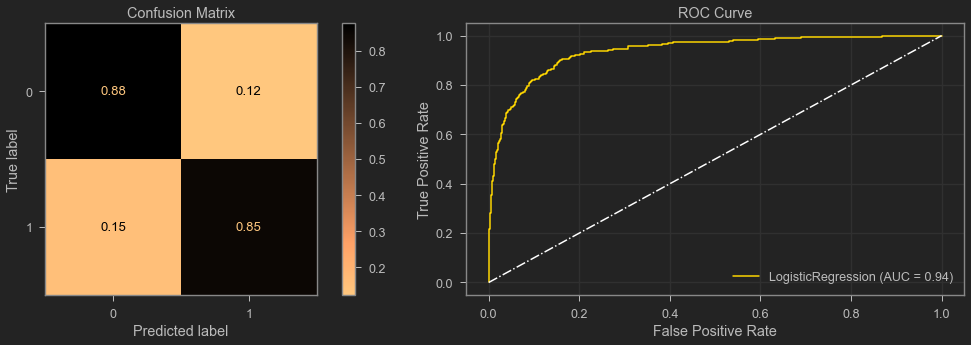

In [113]:
# with all data
logreg_clf = LogisticRegression(max_iter=1000, class_weight='balanced')
# score of logistic regression classifier
fn.model_report(logreg_clf,
                X_train_log_reg,
                y_train_log_reg,
                X_test_log_reg,
                y_test_log_reg,
                show_train_report=False)

In [114]:
fn.drop_features_based_on_correlation(X_train_log_reg, .8)

{'Avg_Open_To_Buy',
 'Card_Category_Silver',
 'Gender_M',
 'Total_Trans_Ct',
 'cluster_0'}

******************************************************************************************
Train accuracy score: 0.8626
Test accuracy score: 0.8712
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1701
           1       0.57      0.85      0.68       325

    accuracy                           0.87      2026
   macro avg       0.77      0.86      0.80      2026
weighted avg       0.90      0.87      0.88      2026

************************************************************


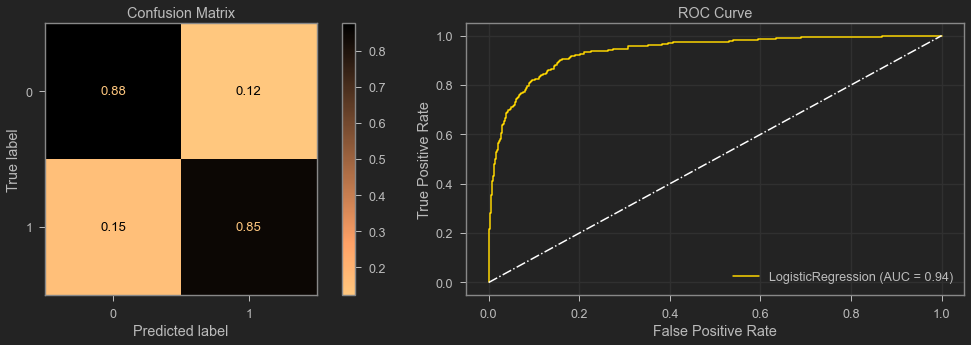

In [115]:
logreg_clf = LogisticRegression(max_iter=1000, class_weight='balanced')
# score of logistic regression classifier
fn.model_report(logreg_clf,
                X_train_log_reg.drop(columns=['Avg_Open_To_Buy']),
                y_train_log_reg,
                X_test_log_reg.drop(columns=['Avg_Open_To_Buy']),
                y_test_log_reg,
                show_train_report=False)

In [116]:
churn_feature = pd.DataFrame(
    logreg_clf.coef_,columns=X_train_log_reg.drop(columns=['Avg_Open_To_Buy']).columns).T
churn_feature.columns = ['weights']
churn_feature['odds_ratio'] = np.exp(churn_feature['weights'])
churn_feature['effect'] = 100 * (churn_feature['odds_ratio'] - 1)
churn_feature

weights  odds_ratio       effect
Customer_Age                   0.045599    1.046655     4.665495
Dependent_count                0.083720    1.087325     8.732485
Months_on_book                -0.008650    0.991387    -0.861293
Total_Relationship_Count      -0.622368    0.536672   -46.332798
Months_Inactive_12_mon         0.532879    1.703830    70.383013
Contacts_Count_12_mon          0.609253    1.839058    83.905756
Credit_Limit                   0.122772    1.130627    13.062667
Total_Revolving_Bal           -0.528595    0.589433   -41.056728
Total_Amt_Chng_Q4_Q1          -0.197604    0.820694   -17.930556
Total_Trans_Amt                3.025048   20.594991  1959.499131
Total_Trans_Ct                -3.473403    0.031011   -96.898868
Total_Ct_Chng_Q4_Q1           -0.652484    0.520750   -47.924962
Avg_Utilization_Ratio         -0.071716    0.930795    -6.920462
Gender_F                       0.339699    1.404525    40.452472
Gender_M                      -0.345867    0.707607   -29.239337
Education_Level_College       -0.178156    0.836812   -16.318787
Education_Level_Doctorate      0.206250    1.229061    22.906099
Education_Level_Graduate      -0.157606    0.854186   -14.581369
Education_Level_High School   -0.133351    0.875158   -12.484181
Education_Level_Post-Graduate  0.354795    1.425889    42.588880
Education_Level_Uneducated     0.018911    1.019091     1.909074
Education_Level_Unknown       -0.117012    0.889574   -11.042577
Marital_Status_Divorced        0.104104    1.109716    10.971584
Marital_Status_Married        -0.297998    0.742303   -25.769707
Marital_Status_Single          0.146251    1.157486    15.748624
Marital_Status_Unknown         0.041475    1.042347     4.234739
Income_Category_40K_to_60K    -0.152518    0.858544   -14.145642
Income_Category_60K_to_80K    -0.152597    0.858475   -14.152472
Income_Category_80K_to_120K    0.177500    1.194229    19.422865
Income_Category_Above_120K     0.403668    1.497307    49.730728
Income_Category_Less_than_40K -0.029993    0.970452    -2.954780
Income_Category_Unknown       -0.252228    0.777067   -22.293282
Card_Category_Blue            -0.243980    0.783503   -21.649662
Card_Category_Gold             0.292556    1.339847    33.984736
Card_Category_Platinum        -0.051447    0.949854    -5.014600
Card_Category_Silver          -0.003297    0.996709    -0.329135
cluster_0                     -3.787859    0.022644   -97.735596
cluster_1                      1.477987    4.384112   338.411231
cluster_2                      1.270212    3.561606   256.160580
cluster_3                      0.598315    1.819051    81.905103
cluster_4                      0.435177    1.545236    54.523639

## SVC

In [117]:
# clf_svc = SVC(kernel='linear', C=100, class_weight='balanced')
# clf_svc = SVC(kernel='rbf', C=1, gamma='auto', class_weight='balanced', tol=.8)
clf_svc = SVC(kernel='poly', degree=4, C=1, gamma='scale', class_weight='balanced')
# clf_svc = SVC(kernel='sigmoid', C=2, class_weight='balanced')

******************************************************************************************
Train accuracy score: 0.9757
Test accuracy score: 0.9373
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1693
           1       0.80      0.83      0.81       333

    accuracy                           0.94      2026
   macro avg       0.88      0.89      0.89      2026
weighted avg       0.94      0.94      0.94      2026

************************************************************


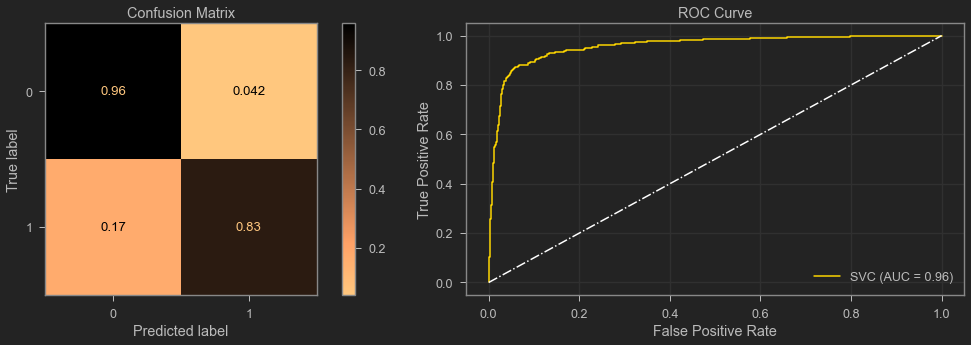

In [118]:
fn.model_report(clf_svc, X_train_pr_os, y_train_encoded_os, X_test_pr, y_test,
             show_train_report=False)